In [1]:
# Importing necessary libraries
import pandas as pd 
import seaborn as sns
import numpy as np
import warnings 
warnings.filterwarnings('ignore')

In [2]:
# What is the data given? 
import os 
data = pd.read_csv("insurance_data.csv")

In [3]:
data.shape
#1340 rows , 10 columns 


(1340, 10)

In [4]:
#Checking duplicates 
data["PatientID"].value_counts()>1
#Every row talks about one customer. 

1       False
901     False
899     False
898     False
897     False
        ...  
446     False
445     False
444     False
443     False
1340    False
Name: PatientID, Length: 1340, dtype: bool

There are 1340 customers of an insurance company in this sample

In [5]:
# Before proceeding further, is the data clean? Null values? 
data.isna().sum()
#We see there are 5 nulls in age column, 3 in region. 

PatientID        0
age              5
gender           0
bmi              0
bloodpressure    0
diabetic         0
children         0
smoker           0
region           3
claim            0
dtype: int64

Out of 1340 observations there are 5 (0.3%) null values in age, 3 (0.2%) null values in region. 

**How do we handle these Null Values?**

1. Why are the null values present in age? 

Probably some data entry mistake or someone didn't want to give their age. 

2. Why are null values in the region? 

Like above, some data entry mistake or someone didn't want to mention their region. 


We need to gain some insights about the variable before we go about how to deal with them. 

1. Age: 5 Null Values out of 1340 observations 

Age is a continuous numerical variable. (Though here in the data set and generally it is discrete as it is expressed in years)

Mean : 38.07 

Median : 38.00

They are nearly same. 

We can impute the 5 null values with mean age which is **38.07** as it is the expected age for a person in this data. 

2. Region : 3 Null values. 

Region is a categorical variable.

There are only three null values, the best solution we can arrive at is to impute them with the mode. - Most repeated region in the entire data set. 


**Why are we not deleting them? (They are anyway very less in number)**

Other than these two columns, no other column has missing values in it. Deleting 5 - 8 rows will lead to an unnecessary loss of information. 

In [6]:
data.describe() 
#We are using mean - mean is the expected age for a given person.

,PatientID,age,bmi,bloodpressure,children,claim
count,1340.000000,1335.000000,1340.000000,1340.000000,1340.000000,1340.000000
mean,670.500000,38.078652,30.668955,94.157463,1.093284,13252.745642
std,386.968991,11.102924,6.106735,11.434712,1.205334,12109.609288
min,1.000000,18.000000,16.000000,80.000000,0.000000,1121.870000
25%,335.750000,29.000000,26.275000,86.000000,0.000000,4719.685000
50%,670.500000,38.000000,30.400000,92.000000,1.000000,9369.615000
75%,1005.250000,47.000000,34.700000,99.000000,2.000000,16604.305000
max,1340.000000,60.000000,53.100000,140.000000,5.000000,63770.430000


### Imputing missing values 

**1. Age**

In [7]:
np.mean(data.age)
# Mean age of the people in this sample is 38.08 

38.07865168539326

In [8]:
#Imputing the values for the missing values 
data['age']=data['age'].fillna(38.08)

In [9]:
data.isna().sum() #Successfully imputed in age 

PatientID        0
age              0
gender           0
bmi              0
bloodpressure    0
diabetic         0
children         0
smoker           0
region           3
claim            0
dtype: int64

**2. Region**

In [10]:
from scipy import stats

In [11]:
#Imputing in region 
stats.mode(data.region) 
#South east is the mode 

ModeResult(mode=array(['southeast'], dtype=object), count=array([443]))

In [12]:
data['region']=data['region'].fillna('southeast')

In [13]:
data.isna().sum() #Successfully imputed in region also. 

PatientID        0
age              0
gender           0
bmi              0
bloodpressure    0
diabetic         0
children         0
smoker           0
region           0
claim            0
dtype: int64

In [14]:
#Just checking if we did it right
#PatientId 3 age was null 
#PatientId 14 region was null 
data.iloc[2,:]

PatientID                3
age                  38.08
gender                male
bmi                   33.3
bloodpressure           82
diabetic               Yes
children                 0
smoker                  No
region           southeast
claim              1135.94
Name: 2, dtype: object

In [15]:
data.iloc[13,:]

PatientID               14
age                   32.0
gender                male
bmi                   27.6
bloodpressure          100
diabetic                No
children                 0
smoker                  No
region           southeast
claim              1252.41
Name: 13, dtype: object

In [16]:
#Now the data is ready to be studied. 

## 1. Univariate Analysis 

1. I want to look at the mean, and other stats of all the variabels in my data.Why do I want that? 

 A. To know the customers well 

In [180]:
data.describe()

,PatientID,age,bmi,bloodpressure,children,claim
count,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000
mean,670.500000,38.078657,30.668955,94.157463,1.093284,13252.745642
std,386.968991,11.082175,6.106735,11.434712,1.205334,12109.609288
min,1.000000,18.000000,16.000000,80.000000,0.000000,1121.870000
25%,335.750000,29.000000,26.275000,86.000000,0.000000,4719.685000
50%,670.500000,38.000000,30.400000,92.000000,1.000000,9369.615000
75%,1005.250000,47.000000,34.700000,99.000000,2.000000,16604.305000
max,1340.000000,60.000000,53.100000,140.000000,5.000000,63770.430000


1. There are 1340 customers in this sample 
--------------------------------------------------------------------------------------------
AGE
-------------------------------------------------------------------------------------------------
1. Youngest customer is 18 yo and the oldest is 60 yo. 
2. The average age of the customers in the sample is 38.07 
3. Only 25% of the customers under our analysis are older than 47y 
4. 50% of the customers belong to the age group 29-47.
5. Majority (75%) of the cutomers are below 47 yo. 
-------------------------------------------------------------------------------------------------
BMI 
----------------------------------------------------------------------------------------------------
BMI is an indicator of health of individuals. 
1. Range of BMI in the sample : 16 - 53. 
2. The average BMI of the customers is : 30.66 
3. 75% percent of the customers in the sample have BMI above 25, meaning 75% in the sample are overweight or obese. 
-----------------------------------------------------------------------------------------------
Blood Pressure 
-----------------------------------------------------------------------------------------------------
The Blood Pressure description is not given. 

1. Range of BP in our sample is : 80 - 140

2. 75% of the customers in the sample have a BP above 86.

Going by the BMI stats and looking at the ranges of systolic and diastolic BP, we assume that it is the diastolic BP that is given. 

1. 25th percentile : 86 meaning, 75% of the customers have high BP 
2. almost 25% of the customers have high BP - stage 2 


-------------------------------------------------------------------------------------------------
Children 
------------------------------------------------------------------------------------------------------
Number of children range : 0-5 
1. Only 25% of the customers have more than 2 children 
2. 25% of the customers have no children at all. 
-------------------------------------------------------------------------------------------------
Claim Amount 
------------------------------------------------------------------------------------------------------
1. Range of amount claimed: $ 1,121.87  $ - $ 63,770.43 $ (Assuming the currency is in  dollars)

2. Mean amount claimed is around $13,000 $


3. 75% of the customers claim below $ 16,604.30 $

##### We have to plot every column 
Why do we need to look at the distribution? 

Helps us know the customers more.

Eg: how is the BMI distributed across the customers? 

### Generating Univariate Analysis Graphs

In [17]:
import matplotlib.pyplot as plt

In [18]:
def graph_v2(file):
    dat=pd.read_csv(file)
    for i in dat.columns:
        if i in dat.loc[:,dat.dtypes==object] or dat[i].value_counts().count()<10: 
            #Here we are trying to get a bar plot for categorical as well as discrete numbers <10
            dat[i].value_counts().plot(kind='bar', figsize=(10,8), color='turquoise', fontsize=12, rot=0)
            plt.xlabel(i,fontsize=15)
            plt.ylabel('Frequency',fontsize=15)
            fig=plt.gcf()
            plt.show()
            #fig.savefig(i+'.jpg',dpi=100)
        else:
            plt.subplot(2,1,2)
            plt.hist(dat[i],histtype='bar',bins=20,color='turquoise',edgecolor='white')
            plt.xlabel(i)
            plt.ylabel('Frequency')

            plt.subplot(2,1,1)
            plt.boxplot(dat[i], vert=False)
            plt.title(f'Distribution of {i}')
            fig1=plt.gcf()
            plt.show()
            #fig1.savefig(i+'.jpg',dpi=100)

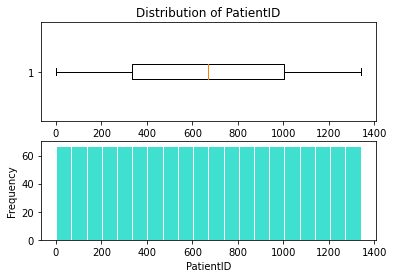

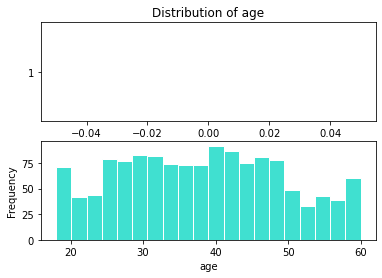

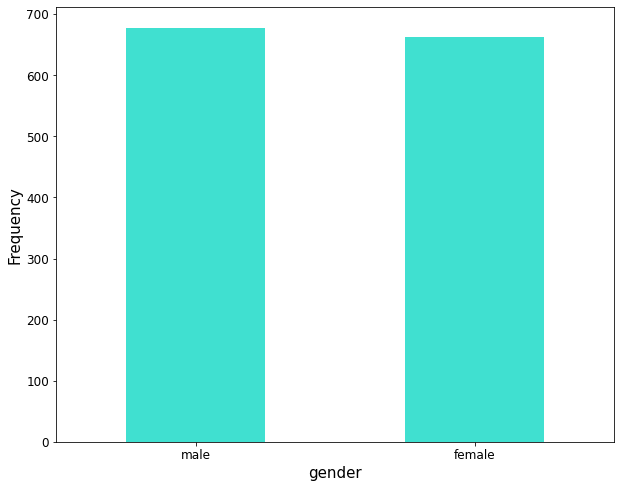

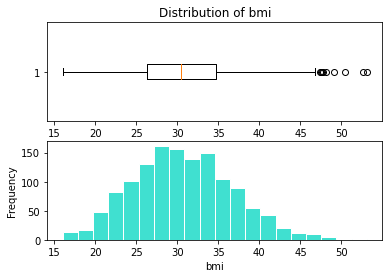

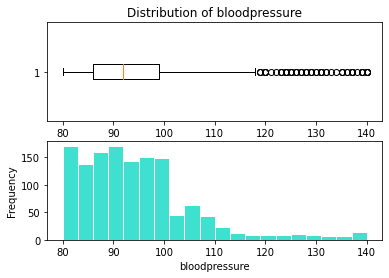

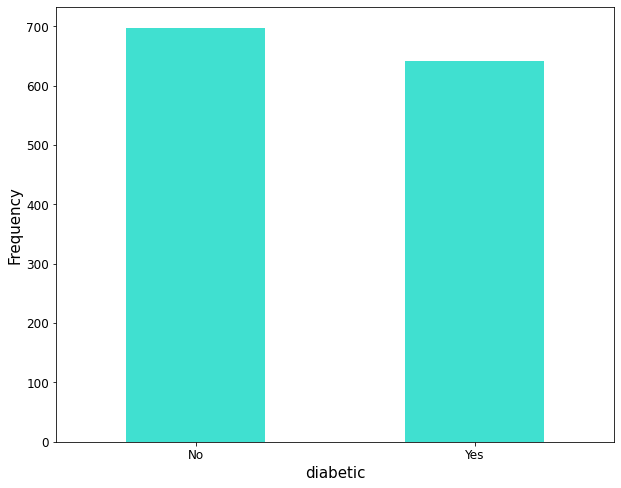

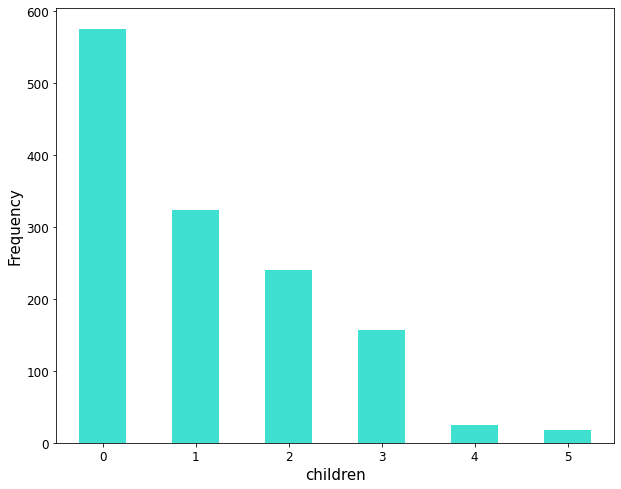

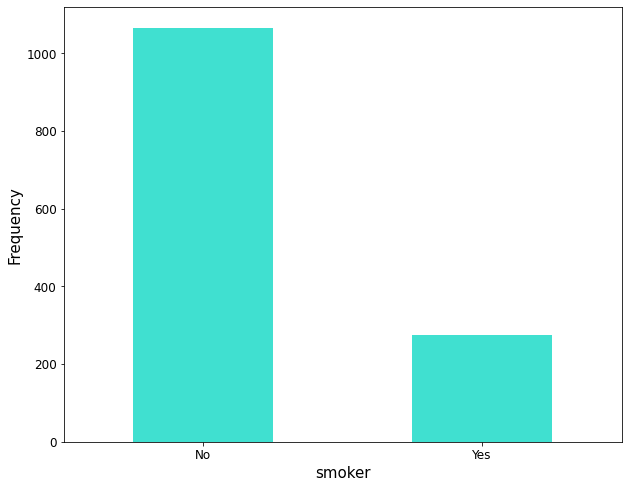

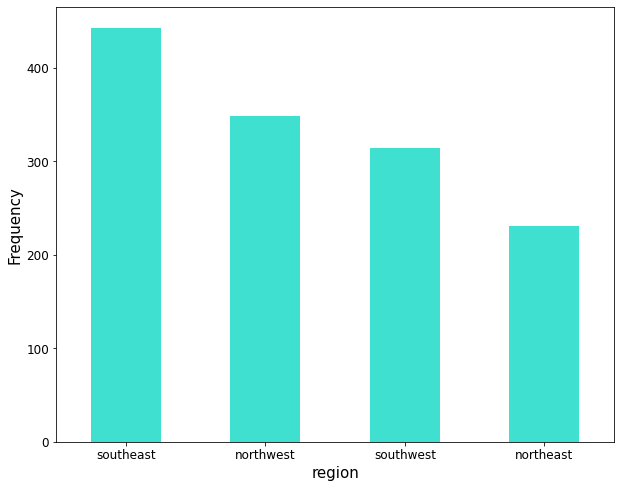

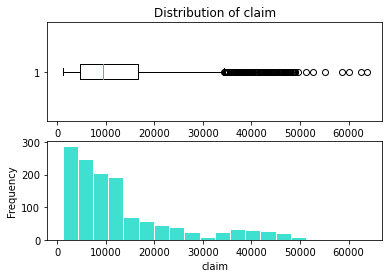

In [183]:
graph_v2("insurance_data.csv")

Univariate Analysis Findings: 
------------------------------------------------------------------------------
AGE
------------------------------------------------------------------------------
1. Majority (75%) of the cutomers are below 47 yo
---------------------------------------------------------------------------
Gender
---------------------------------------------------------------------------
1. Men tend to work in riskier environments, there are chances that they are at higher risk, they might claim insurnce more than women (Assumption) 
Men and women are almost equal in this sample. For the regression model, the impact might not be great
------------------------------------------------------------------------
Diabetic 
----------------------------------------------------------------------------
1. The portion of people with diabetes is only slightly lesser than the peole not with diabetes. Almost 50% have diabetes. 
This is expected as we saw that most of the customers didn't have a healthy BMI. 
------------------------------------------------------------------------
BMI
-------------------------------------------------------------------------------
It is normally distributed with a mean at 30.6.Meaning, highest number of customers have a BMI @30 which is concerning. 
Most customers seem to have a sedentary lifestyle which might result in many diseases. 
We assume BMI will have a very high effect on insurance claim. 
High BMI> Diseases> More claim >More risk 

-----------------------------------------------------------------------------
Blood Pressure
--------------------------------------------------------------------------------
It is right skewed. Meaning there are people with very high blood pressure, in this case from 120 - 140. 
Majority (75%) of the customers have High Blood pressure(>80).

#### Feature Transformation idea 1 : ---------------------------------------------------------------------------------------------------------------------

**We can divide our customers into 3 buckets.** 

**High BP** 

Stage 1: 80-89

Stage 2: >90

Hipertensive Crisis: >120 

Let us see the behavior of the claim w.r.t each of these buckets. In our analysis later. 

--------------------------------------------------------------------------
Smokers
------------------------------------------------------------------------------
1. Very less number of smokers 
2. We assume that smokers will claim more 
--------------------------------------------------------------------------
Region 
-----------------------------------------------------------------------------
1. Less customers from Northeast Region - More Untapped potential for the company. 
2. Highest number of customers from south east region. 
3. However, the customers are distributed well among south east, northwest,south west regions. 

Why is the 3rd point relevant? 

say a seasonal disease affects people in south east region, the company knows they will have more claims. That makes them more risky. 

However, those external factors are not mentioned in our data. So the most we can do is find the relation between region and claim. 

-----------------------------------------------------------------------------
Claim
----------------------------------------------------------------------------------
1. Distribution is right Skewed becasue of the outliers towards the higher end. There are customers who claimed very high compared to 75% of the claims made by customers 


## Gender:

Number of men: 678 

Number of women: 662

-----------------------------------------------------
------------------------------------------------------

## 2. Bivariate Analysis

Dropping patient ID from the analysis becasue it is not adding any value here

In [19]:
df = data

In [20]:
df

,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,1,39.00,male,23.2,91,Yes,0,No,southeast,1121.87
1,2,24.00,male,30.1,87,No,0,No,southeast,1131.51
2,3,38.08,male,33.3,82,Yes,0,No,southeast,1135.94
3,4,38.08,male,33.7,80,No,0,No,northwest,1136.40
4,5,38.08,male,34.1,100,No,0,No,northwest,1137.01
...,...,...,...,...,...,...,...,...,...,...
1335,1336,44.00,female,35.5,88,Yes,0,Yes,northwest,55135.40
1336,1337,59.00,female,38.1,120,No,1,Yes,northeast,58571.07
1337,1338,30.00,male,34.5,91,Yes,3,Yes,northwest,60021.40
1338,1339,37.00,male,30.4,106,No,0,Yes,southeast,62592.87


In [21]:
df = df.drop(['PatientID'],axis=1)
df.head()

,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,39.00,male,23.2,91,Yes,0,No,southeast,1121.87
1,24.00,male,30.1,87,No,0,No,southeast,1131.51
2,38.08,male,33.3,82,Yes,0,No,southeast,1135.94
3,38.08,male,33.7,80,No,0,No,northwest,1136.40
4,38.08,male,34.1,100,No,0,No,northwest,1137.01


## 2.1 Pair wise plot - Gallery 
# -----------------------------------------------------------------------------------------------------------

1. This will help us see if there is any clear trend between some varaibles. 
2. We will take these inferences and explore further

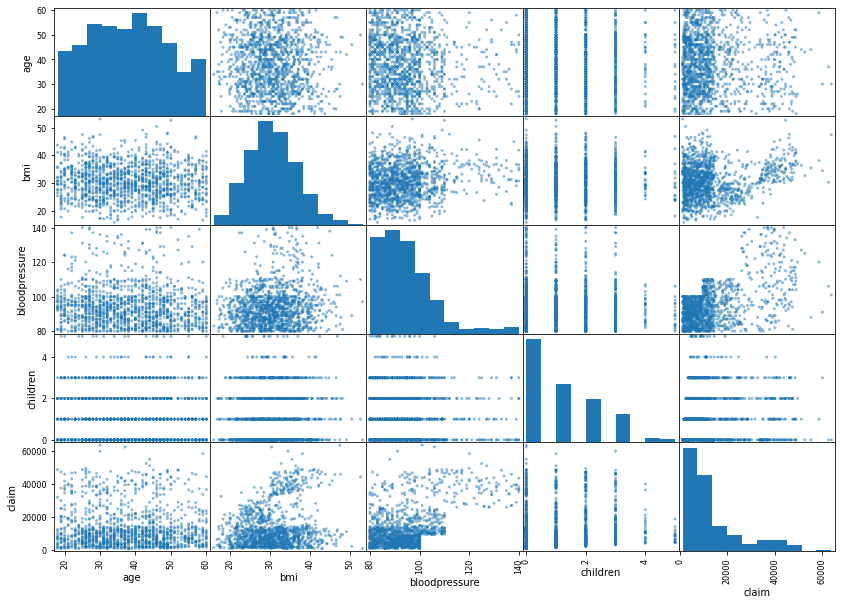

In [22]:
#Seeing pair wise right now 
#This gives us a Bird's eye view of how variables are related to each other. 
from pandas.plotting import scatter_matrix
scatter_matrix(df,alpha = 0.5,
               figsize = (14,10),diagonal = 'hist')
plt.show()

In [23]:
corr = df.corr()
corr.style.background_gradient()

,age,bmi,bloodpressure,children,claim
age,1.000000,-0.041919,-0.060247,-0.025508,-0.027857
bmi,-0.041919,1.000000,0.143544,0.012092,0.197401
bloodpressure,-0.060247,0.143544,1.000000,-0.031682,0.531341
children,-0.025508,0.012092,-0.031682,1.000000,0.069233
claim,-0.027857,0.197401,0.531341,0.069233,1.000000


## 2.1.1 What are the variables that have high correlation with claim?  

1. Blood pressure has the highest correlation with claim amount. Correlation Percentage : 53%
2. BMI has the second highest correlation with claim amount. Correlation percentage: 19.7 ~ 20%

The rest of the variables : Age, Children have a very less correlation. This is expected as the scatter plots above showed the same thing. There was no any clear relationship observed. 

##  2.1.2 Findings 
---------------------------------------------
**1. Age - Claim** 
---------------------------------------------
1. Age is not displaying any clear correlation with claim. 

2. To study age further, we will look at the box-plots.

**We assumed a linear upward trend between age and claim which is contradicted here**

----------------------------------------------
**2. BMI - Claim**
----------------------------------------------
1. We see a linear upward trend for a set of customers. As the BMI increases, the claim seems to increase.

2. A majority of customers with higher BMI don't seem to be claiming more, they seem to be claiming just like their lower BMI counterparts. 

**So, for the customers for whom a clear upward trend is seen, are there other factors affecting this? 
Like BP, smokers?** 

-------------------> This will be checked in our Multivariate Analysis 

---------------------------------------------------
**3. Blood Pressure - claim**
----------------------------------------------------------------
1. There is some interesting and specific trend that is seen here 

2. A cut off at 100units(bp) is seen. Below 100 Bp, majority of the claims seem to be concentrated below a claim of 15000(approx).  

3. Once the **BP crosses 100, no customer has a claim below 15,000 units**. So it can be clearly seen that an applicant with BP > 100 is a clear risky applicant. They have a very high chance of claiming more. 

4. **110 also seems like some kind of cutoff above which no customer has a claim below 30,000 units.**

#### Feature engineering idea 1.1 -------------------------------------------------------------------------------------------

5. **We will use bucketing to segregate the customers with the above cutoffs : 100 BP,110 BP in addition to the above specified buckets if needed**. 

-----------------------------------------------------
## 4. Children - Claim 
1. The scatter plot is not giving much information about claim in case of children 

2. We need to look at the **box plots for this to understand better** 



-------------------------------------------------------
In the above plots we missed these variables as they are categorical in the data set 
1. Gender 
2. Diabetic 
3. smoker. 

We will look at the box plots here 

----------------------------------------------


## 5. Gender - Claim 

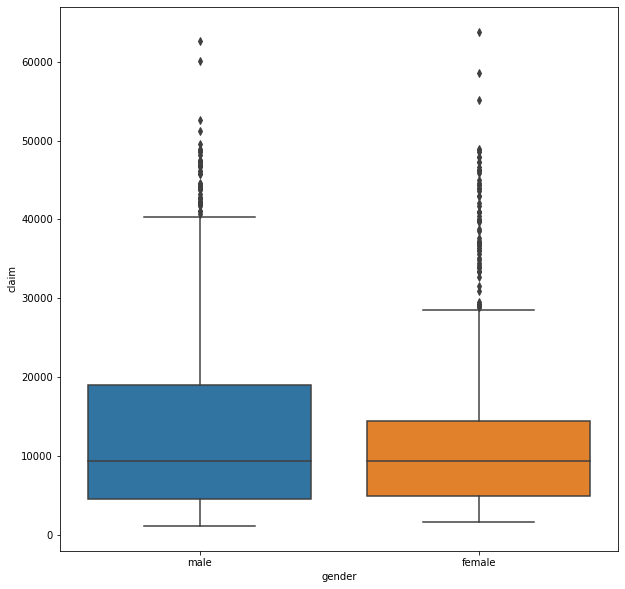

In [24]:
sns.boxplot(x = "gender",y= "claim",data = df)
plt.gcf().set_size_inches(10, 10)
plt.show()
# Significant claims seen in men compared to women 

### 5.1 Findings 
----------------------------------------------------
1. We see that the median and minimum claims of men and women are nearly similar. 

**Is the average claims of men and women same?** 

We will do a Hypothesis testing here to check it. Expecting that they won't be similar. As the distributions are really different.

### 5.1.1 Hypothesis testing 

Mean claim of men : 13,919.79

Mean claim of women:  12,569.57

The difference in the mean claim of men and women is 1,350 dollars. 

**Is the mean claim of men and women same in the population?**


---------------------------------------------
###### Getting requisite values from data
--------------------------------------------

In [190]:
# Getting the  mean claim by the gender
df.groupby(["gender"])['claim'].mean()

gender
female    12569.578897
male      13919.790457
Name: claim, dtype: float64

The difference in the mean claim of men and women is 1,350 dollars. 

In [191]:
# Getting the std of the claim by the gender
df.groupby(["gender"])['claim'].std()

gender
female    11128.703817
male      12969.700466
Name: claim, dtype: float64

In [192]:
# Getting the count of female and male respectively
df.groupby(["gender"]).count()

,age,bmi,bloodpressure,diabetic,children,smoker,region,claim
gender,,,,,,,,
female,662,662,662,662,662,662,662,662
male,678,678,678,678,678,678,678,678


------------------------------------
##### Hypothesis Test 
-----------------------------------------

##### Null Hypothesis: The average claim of the men and women is equal
##### Alternate Hypothesis: The average claim of the men and women is not equal

In [193]:
# H0 : Mean(mean) = mean(women), so x1-x2 = 0 #Two tail test 
# Ha : mean(men) != mean(women)

# If the difference in the mean claims of men and women is significant, then this becomes an important feature. 
# Beta error where we accept that the difference not there when difference is there, would not be good for us. 
#While, including gender as a predictor when we are predicting claim even if gender is not significant 
#won't cause much harm as the model can be updated according to the outputs. 
alpha = 0.05 
x1 = 12569.578897 #Female
x2= 13919.790457 #Male
sig1 = 11128.703817 #Female
sig2 = 12969.700466 #Male
n1 = 662 #Fm 
n2 = 678 #M
z = (x1-x2)/((sig1**2/n1)+(sig2**2/n2))**0.5
z
# using the Z static method

-2.046753579049191

In [194]:
zcrit = stats.norm.ppf(0.05/2)
zcrit

-1.9599639845400545

In [195]:
#Using the p value method 
2*stats.norm.cdf(-2.046)

0.040756370674284524

Null Hypothesis is rejected.

-----------------------------------------------
###### Conclusion : 

1. Z- stat is less than z critical 
2. P- value is less than the significance level 
3. So, we conclude that **for the population, there is a statistically significant difference between average claims of men and women**. 

2. Like assumed, the maximum claim for women is much lesser than the maximum claim for men. 

3. For the 50% of women, the claim is not as widely distributed as claims for men. 

4. So, though the average claim of men and women seems equal, there is a higher chance for men to claim more than 10,000 units ( In the distribution, 50% of the customers fall in this category). 

## 6. Diabetic - Claim 
1. Like already mentioned, we are assuming that having diabetes will make a difference in the claim amount. It will be more. Let's see that. 

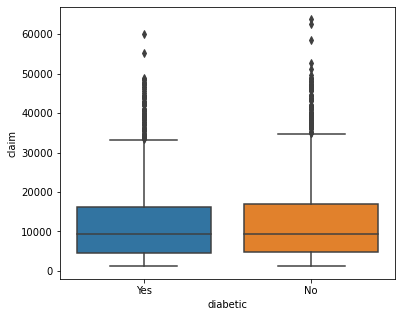

In [25]:
sns.boxplot(x = "diabetic",y= "claim",data = df)
plt.gcf().set_size_inches(6, 5)

plt.show()
#Daiabetic mean claim seems same. Which is odd. So we are testing to see if they are really equal 
#The distributions of both the claims look same. 
#Even the mean is same? Is the average claim of diabetic and non diabetic patients same?

# 6.1 Hypothesis
## Our Claim : 
The average claim of diabetic patients and non diabetic patients will be different.   
H0 : The average claim of diabetic and non diabetic patients are same.  
H1 : The average claim of diabetic and non diabetic patients are different. 

In [197]:
# Getting the mean claim for customers with and without diabetes
df.groupby(["diabetic"])['claim'].mean()

diabetic
No     13354.031991
Yes    13142.624346
Name: claim, dtype: float64

In [198]:
# Getting the standard deviation of claim for customers with and without diabetes
df.groupby(["diabetic"])['claim'].std()

diabetic
No     12275.376160
Yes    11935.356153
Name: claim, dtype: float64

In [199]:
# Getting the count of customers with and without diabetes
df.groupby(["diabetic"])['claim'].count()

diabetic
No     698
Yes    642
Name: claim, dtype: int64

In [200]:
# H0 : mean claim(diabetes) = mean claim(without diabetes)
# HA : mean claim(diabetes) != mean claim(without diabetes) 

alpha = 0.05 
x1 = 13142.62  #yes
x2 = 13354.03 #no
sig1 = 11935.35
sig2 = 12275.37
n1 = 642
n2 = 698 
z = (x1-x2)/((sig1**2/n1)+(sig2**2/n2))**0.5
z
pv = stats.norm.cdf(-0.31)
z, pv  
#Alpha = 0.05 

(-0.3195235063532939, 0.3782804781779807)

##### We fail to reject null hypothesis as pvalue>alpha. The difference in mean claim between people with diabetic and people without diabetic is not statistically significant.

## 7. Children - Claim 
We did not observe any clear pattern between number of children and claim amount. We should look at boxplots to figure out if we can get any insights

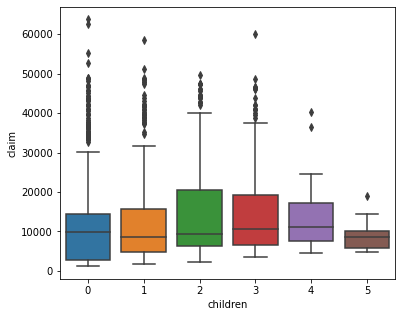

In [26]:
sns.boxplot(x = "children",y= "claim",data = df)
plt.gcf().set_size_inches(6, 5)

plt.show()

## 7.1 Observations: 
1. The distribution of claims for people with 2 and 3 children is more spread out than for others. This means that, if a person has 2/3 children, there is a higher chance for him to claim an amount more than 10K units which seems to be the median claim of every category 
2. For people with 5 children, the claim amount is not even above 20K units. 
3. For other categories it is similar, with 4 children category claiming a maximum of around 25K. the other two categories are at a maximum claim of 30K 
4. **This, doesn't show any clear trend**
5. Assuming that correlation between number of children and claim amount will come out to be very low. Is that so? 

## 7.1.2 Feature Engineering idea : Can reducing to two or three categories as having and not having children make a difference on the amount claimed? 
This comes from the assumption that people with children will cover their family (including Children) in their insurance policy. 
We have to make these two bins and see if that makes a difference in claim amounts. 

In [27]:
df.children

0       0
1       0
2       0
3       0
4       0
       ..
1335    0
1336    1
1337    3
1338    0
1339    0
Name: children, Length: 1340, dtype: int64

In [28]:
# Changing the children column as 0 and 1. 0 representing people with no children and 1 representing people with 1 or more
# children, in our case 1,2,3,4,5 childrens are classified as 1.

# children 0 = 0 , 1,2,3,4,5 = 1
df["children_yes_no"] = df["children"].replace([1,2,3,4,5], 1)

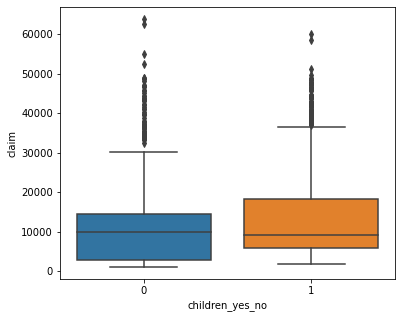

In [29]:
sns.boxplot(x = "children_yes_no",y= "claim",data = df)
plt.gcf().set_size_inches(6, 5)

plt.show()

## 7.1.2.1 Observations: 
1. Maximum claim of people with children is higher than people with no children. This does't adequately justify that people with children claim more. 
2. Looking at Q3, among the 25% of the customers with children, claim is spread out between 10K - nearly 20K, for no children the spread is almost half. 
3. Now, will this tell us that, if a person with children has high chance of claiming more? 

# 8. Smoker

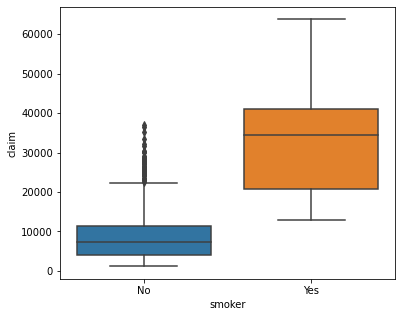

In [30]:
# Getting the boxplot for smoker and claim
sns.boxplot(x = "smoker",y= "claim",data = df)
plt.gcf().set_size_inches(6, 5)

plt.show()

### Observation:  
From the above boxplot, it is clearly understood that the people who smoke claim more amount compared to people who do not smoke.

## 9. Region

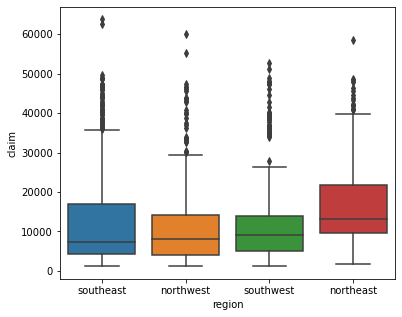

In [31]:
sns.boxplot(x = "region",y= "claim",data = df)
plt.gcf().set_size_inches(6, 5)

plt.show()
# All regions seem to have a same mean claim. Is the claim difference between these regions statistically significant? 

## Hypothesis: 
**Null Hypothesis: Mean claim of all 3 regions - Southeast, Northwest and Southwest is same**  
**Alternate Hypothesis: Mean claim of all 3 regions - Southeast, Northwest and Southwest are not same**

We are including only the above 3 regions to test the mean claim because from the above boxplot we can clearly see that mean claim of the northeast region is higher compared to the other 3 regions.   
Hence, we are excluding the northeast region from our hypothesis test.

In [32]:
# 3 populations so doing an ANOVA test 
#Creating a list of 3 separate samples from region column and preparing the data for ANOVA test
region = df.region.tolist()

In [33]:
n1 = 446 #south east 
n2 = 349 #north west 
n3 = 314 #south west
n = n1+n2+n3
r = 3

In [34]:
#Creating a list of claims and combining region and claim in a new dataframe
claim = df.claim.tolist()
region_claim = pd.DataFrame(np.column_stack([region, claim]), 
                               columns=['region', 'claim'])
region_claim

,region,claim
0,southeast,1121.87
1,southeast,1131.51
2,southeast,1135.94
3,northwest,1136.4
4,northwest,1137.01
...,...,...
1335,northwest,55135.4
1336,northeast,58571.07
1337,northwest,60021.4
1338,southeast,62592.87


In [35]:
# Pivoting the new dataframe with column names as regions and their claims
region_claim=region_claim.pivot(columns='region', values='claim')
region_claim

region,northeast,northwest,southeast,southwest
0,NaN,NaN,1121.87,NaN
1,NaN,NaN,1131.51,NaN
2,NaN,NaN,1135.94,NaN
3,NaN,1136.4,NaN,NaN
4,NaN,1137.01,NaN,NaN
...,...,...,...,...
1335,NaN,55135.4,NaN,NaN
1336,58571.07,NaN,NaN,NaN
1337,NaN,60021.4,NaN,NaN
1338,NaN,NaN,62592.87,NaN


In [36]:
# creating a list of claim for the region southeast
southeast=region_claim[~region_claim['southeast'].isnull()]
southeast=southeast.southeast.tolist()
southeast

['1121.87',
 '1131.51',
 '1135.94',
 '1252.41',
 '1253.94',
 '1256.3',
 '1391.53',
 '1515.34',
 '1532.47',
 '1534.3',
 '1607.51',
 '1615.77',
 '1621.88',
 '1622.19',
 '1629.83',
 '1631.67',
 '1631.82',
 '1633.04',
 '1633.96',
 '1634.57',
 '1665.0',
 '1674.63',
 '1719.44',
 '1720.35',
 '1725.55',
 '1727.54',
 '1815.88',
 '1824.29',
 '1837.28',
 '1877.93',
 '1880.07',
 '1981.58',
 '1984.45',
 '1986.93',
 '2020.55',
 '2026.97',
 '2137.65',
 '2155.68',
 '2156.75',
 '2196.47',
 '2198.19',
 '2200.83',
 '2201.1',
 '2203.47',
 '2203.74',
 '2205.98',
 '2207.7',
 '2211.13',
 '2217.47',
 '2217.6',
 '2219.45',
 '2304.0',
 '2322.62',
 '2395.17',
 '2396.1',
 '2438.06',
 '2457.21',
 '2459.72',
 '2464.62',
 '2473.33',
 '2480.98',
 '2483.74',
 '2497.04',
 '2498.41',
 '2566.47',
 '2585.85',
 '2689.5',
 '2721.32',
 '2727.4',
 '2731.91',
 '2741.95',
 '2801.26',
 '2867.12',
 '2902.91',
 '2927.06',
 '3056.39',
 '3171.61',
 '3180.51',
 '3227.12',
 '3238.44',
 '3366.67',
 '3392.37',
 '3392.98',
 '3393.36',
 '

In [37]:
# creating a list of claim for the region northwest
northwest=region_claim[~region_claim['northwest'].isnull()]
northwest=northwest.northwest.tolist()
northwest

['1136.4',
 '1137.01',
 '1137.47',
 '1141.45',
 '1146.8',
 '1149.4',
 '1163.46',
 '1241.57',
 '1242.26',
 '1242.82',
 '1149.4',
 '1621.34',
 '1625.43',
 '1627.28',
 '1628.47',
 '1632.04',
 '1632.56',
 '1635.73',
 '1639.56',
 '1639.56',
 '1646.43',
 '1704.7',
 '1705.62',
 '1708.0',
 '1708.93',
 '1711.03',
 '1712.23',
 '1769.53',
 '1906.36',
 '1909.53',
 '1917.32',
 '1969.61',
 '1972.95',
 '1977.82',
 '1980.07',
 '2045.69',
 '2055.32',
 '2117.34',
 '2128.43',
 '2130.68',
 '2134.9',
 '2136.88',
 '2138.07',
 '2221.56',
 '2250.84',
 '2254.8',
 '2257.48',
 '2261.57',
 '2302.3',
 '2352.97',
 '2362.23',
 '2404.73',
 '2523.17',
 '2527.82',
 '2534.39',
 '2639.04',
 '2643.27',
 '2680.95',
 '2690.11',
 '2699.57',
 '2709.11',
 '2709.24',
 '2710.83',
 '2719.28',
 '2730.11',
 '2775.19',
 '2789.06',
 '2803.7',
 '2842.76',
 '2850.68',
 '2855.44',
 '3021.81',
 '3062.51',
 '3077.1',
 '3176.29',
 '3176.82',
 '3201.25',
 '3292.53',
 '3353.47',
 '3537.7',
 '3556.92',
 '3579.83',
 '3594.17',
 '3736.46',
 '38

In [38]:
# creating a list of claim for the region southwest
southwest=region_claim[~region_claim['southwest'].isnull()]
southwest=southwest.southwest.tolist()
southwest

['1261.44',
 '1261.86',
 '1263.25',
 '1526.31',
 '1682.6',
 '1727.79',
 '1728.9',
 '1731.68',
 '1737.38',
 '1743.21',
 '1744.47',
 '1748.77',
 '1759.34',
 '1826.84',
 '1832.09',
 '1837.24',
 '1842.52',
 '1875.34',
 '1880.49',
 '1964.78',
 '2007.95',
 '2020.18',
 '2103.08',
 '2150.47',
 '2154.36',
 '2166.73',
 '2331.52',
 '2416.96',
 '2457.5',
 '2494.02',
 '2585.27',
 '2597.78',
 '2632.99',
 '2866.09',
 '2904.09',
 '2913.57',
 '2974.13',
 '3161.45',
 '3172.02',
 '3208.79',
 '3260.2',
 '3277.16',
 '3353.28',
 '3378.91',
 '3410.32',
 '3443.06',
 '3484.33',
 '3554.2',
 '3578.0',
 '3591.48',
 '3597.6',
 '3659.35',
 '3693.43',
 '3761.29',
 '3847.67',
 '3906.13',
 '3987.93',
 '3989.84',
 '4076.5',
 '4149.74',
 '4234.93',
 '4260.74',
 '4391.65',
 '4402.23',
 '4529.48',
 '4536.26',
 '4646.76',
 '4670.64',
 '4687.8',
 '4746.34',
 '4751.07',
 '4762.33',
 '4766.02',
 '4830.63',
 '4883.87',
 '4931.65',
 '4934.71',
 '5003.85',
 '5012.47',
 '5080.1',
 '5152.13',
 '5240.77',
 '5246.05',
 '5253.52',
 '

In [39]:
# creating a list of claim for the region northeast
northeast=region_claim[~region_claim['northeast'].isnull()]
northeast=northeast.northeast.tolist()
northeast

['1694.8',
 '1702.46',
 '1704.57',
 '1967.02',
 '2102.26',
 '2104.11',
 '2755.02',
 '2897.32',
 '2899.49',
 '3044.21',
 '3046.06',
 '3070.81',
 '1704.57',
 '3167.46',
 '3206.49',
 '3213.62',
 '3268.85',
 '3279.87',
 '3309.79',
 '3385.4',
 '3645.09',
 '3732.63',
 '3857.76',
 '3861.21',
 '3925.76',
 '3943.6',
 '4005.42',
 '4040.56',
 '7935.29',
 '7985.82',
 '7986.48',
 '8252.28',
 '8302.54',
 '8334.46',
 '8334.59',
 '8342.91',
 '8534.67',
 '8538.29',
 '8603.82',
 '8604.48',
 '8606.22',
 '8627.54',
 '8688.86',
 '8823.99',
 '8891.14',
 '8964.06',
 '9095.07',
 '9222.4',
 '9225.26',
 '9282.48',
 '9288.03',
 '9290.14',
 '9361.33',
 '9411.01',
 '9432.93',
 '9447.25',
 '9447.38',
 '9500.57',
 '9541.7',
 '9617.66',
 '9704.67',
 '9715.84',
 '9722.77',
 '9778.35',
 '9866.3',
 '9875.68',
 '9957.72',
 '9964.06',
 '10043.25',
 '10072.06',
 '10106.13',
 '10141.14',
 '10197.77',
 '10370.91',
 '10407.09',
 '10422.92',
 '10435.07',
 '10564.88',
 '10736.87',
 '10796.35',
 '10797.34',
 '10923.93',
 '11165.

In [40]:
# normality tests for the 3 regions - southeast, nothwest and southwest
stats.shapiro(southeast),stats.shapiro(northwest),stats.shapiro(southwest)
#pvalue > alpha(0.05). Hence the null is accepted that the claims of the 3 regions are normally distributed.

(ShapiroResult(statistic=1.0, pvalue=1.0),
 ShapiroResult(statistic=1.0, pvalue=1.0),
 ShapiroResult(statistic=1.0, pvalue=1.0))

In [41]:
# performing ANOVA test on the 3 regions
# alpha = 0.05
f_test, p_val = stats.f_oneway(southeast, northwest, southwest)
print(f_test)
print(p_val)

1.2233297842427946
0.29464658140230515


**pvalue > alpha(0.05). Hence, our null hypothesis is accepted.  Mean claim of all 3 regions - Southeast, Northwest and Southwest are similar.**

**Since the claims for these 3 regions - Southeast, Northwest and Southwest, we are now clubbing these 3 regions into 1 region. We are now checking how much difference in claims between Northeast region and Other regions.**

In [42]:
df.region

0       southeast
1       southeast
2       southeast
3       northwest
4       northwest
          ...    
1335    northwest
1336    northeast
1337    northwest
1338    southeast
1339    southeast
Name: region, Length: 1340, dtype: object

In [43]:
#clubbing the regions as other
df["region"] = df["region"].replace(['southeast','northwest','southwest'], 'other')
df.region

0           other
1           other
2           other
3           other
4           other
          ...    
1335        other
1336    northeast
1337        other
1338        other
1339        other
Name: region, Length: 1340, dtype: object

In [44]:
#Checking the count in the northeast and other regions
df.groupby(["region"])['claim'].count()

region
northeast     231
other        1109
Name: claim, dtype: int64

In [45]:
#Checking the mean for northeast and other regions
df.groupby(["region"])['claim'].mean()

region
northeast    16889.044719
other        12495.319955
Name: claim, dtype: float64

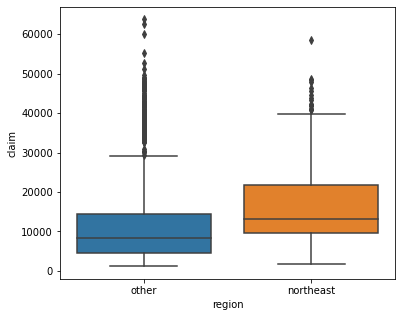

In [46]:
# plotting the graph for region (other vs northest) 
sns.boxplot(x = "region",y= "claim",data = df)
plt.gcf().set_size_inches(6, 5)

plt.show()

## Observations: 
1. Maximum claim of people living in northeast region is more compared to people living in other regions. 
2. Looking at Q3, for people living in northeast region, the claim is more spread out between nearly 15K - 20K. Whereas for people living in other regions, the claim is much lesser than 15K.  


# ---------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------

In [47]:
df

,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim,children_yes_no
0,39.00,male,23.2,91,Yes,0,No,other,1121.87,0
1,24.00,male,30.1,87,No,0,No,other,1131.51,0
2,38.08,male,33.3,82,Yes,0,No,other,1135.94,0
3,38.08,male,33.7,80,No,0,No,other,1136.40,0
4,38.08,male,34.1,100,No,0,No,other,1137.01,0
...,...,...,...,...,...,...,...,...,...,...
1335,44.00,female,35.5,88,Yes,0,Yes,other,55135.40,0
1336,59.00,female,38.1,120,No,1,Yes,northeast,58571.07,1
1337,30.00,male,34.5,91,Yes,3,Yes,other,60021.40,1
1338,37.00,male,30.4,106,No,0,Yes,other,62592.87,0


In [48]:
df = df.replace(to_replace = ["male","female"],value = [1,2])
df = df.replace(to_replace = ["Yes","No"],value = [1,0])
df = df.replace(to_replace = ["other","northeast"],value = [1,2])

In [49]:
df

,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim,children_yes_no
0,39.00,1,23.2,91,1,0,0,1,1121.87,0
1,24.00,1,30.1,87,0,0,0,1,1131.51,0
2,38.08,1,33.3,82,1,0,0,1,1135.94,0
3,38.08,1,33.7,80,0,0,0,1,1136.40,0
4,38.08,1,34.1,100,0,0,0,1,1137.01,0
...,...,...,...,...,...,...,...,...,...,...
1335,44.00,2,35.5,88,1,0,1,1,55135.40,0
1336,59.00,2,38.1,120,0,1,1,2,58571.07,1
1337,30.00,1,34.5,91,1,3,1,1,60021.40,1
1338,37.00,1,30.4,106,0,0,1,1,62592.87,0


### Creating buckets for Blood pressure 

We can divide our customers into 3 buckets.

High BP

Stage 1: 80-89

Stage 2: >90

Hipertensive Crisis: >120

Let us see the behavior of the claim w.r.t each of these buckets.

In [51]:
df["BP_stage_1"] = 0
df["BP_stage_2"] = 0 
df["BP_HP_crisis"] = 0

In [52]:
for i in range(len(df)):
    if df["bloodpressure"][i]>80 and df["bloodpressure"][i]<89:
        df["BP_stage_1"][i] = 1
    elif df["bloodpressure"][i]>90 and df["bloodpressure"][i]< 120:
           df["BP_stage_2"][i] = 1
    else:
        df["BP_HP_crisis"][i] = 1

In [53]:
# Lets make  a range 1,2,3 by creating another variable : bp_range
df["bp_range"] = 0 
for i in range(len(df)):
    if df["bloodpressure"][i]>80 and df["bloodpressure"][i]<89:
        df["bp_range"][i] = 1 #Stage 1 
    elif df["bloodpressure"][i]>90 and df["bloodpressure"][i]< 120:
           df["bp_range"][i] = 2 #For stage 2 
    else:
        df["bp_range"][i] = 3 #For stage 3 

In [54]:
df.head()

,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim,children_yes_no,BP_stage_1,BP_stage_2,BP_HP_crisis,bp_range
0,39.00,1,23.2,91,1,0,0,1,1121.87,0,0,1,0,2
1,24.00,1,30.1,87,0,0,0,1,1131.51,0,1,0,0,1
2,38.08,1,33.3,82,1,0,0,1,1135.94,0,1,0,0,1
3,38.08,1,33.7,80,0,0,0,1,1136.40,0,0,0,1,3
4,38.08,1,34.1,100,0,0,0,1,1137.01,0,0,1,0,2


### Feature Transormations of the attributes

In [55]:
df["s*c"] = df["smoker"]*df["children"]

In [56]:
df["s*d"] = df["smoker"]*df["diabetic"]

In [57]:
df["s*d*a"] = df["smoker"]*df["diabetic"]*df["age"]

In [58]:
df["s*a"] = df["smoker"]*df["age"]

In [59]:
df["s_square"] = df["age"]**2

In [60]:
df

,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim,children_yes_no,BP_stage_1,BP_stage_2,BP_HP_crisis,bp_range,s*c,s*d,s*d*a,s*a,s_square
0,39.00,1,23.2,91,1,0,0,1,1121.87,0,0,1,0,2,0,0,0.0,0.0,1521.0000
1,24.00,1,30.1,87,0,0,0,1,1131.51,0,1,0,0,1,0,0,0.0,0.0,576.0000
2,38.08,1,33.3,82,1,0,0,1,1135.94,0,1,0,0,1,0,0,0.0,0.0,1450.0864
3,38.08,1,33.7,80,0,0,0,1,1136.40,0,0,0,1,3,0,0,0.0,0.0,1450.0864
4,38.08,1,34.1,100,0,0,0,1,1137.01,0,0,1,0,2,0,0,0.0,0.0,1450.0864
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1335,44.00,2,35.5,88,1,0,1,1,55135.40,0,1,0,0,1,0,1,44.0,44.0,1936.0000
1336,59.00,2,38.1,120,0,1,1,2,58571.07,1,0,0,1,3,1,0,0.0,59.0,3481.0000
1337,30.00,1,34.5,91,1,3,1,1,60021.40,1,0,1,0,2,3,1,30.0,30.0,900.0000
1338,37.00,1,30.4,106,0,0,1,1,62592.87,0,0,1,0,2,0,0,0.0,37.0,1369.0000


In [61]:
y = df["claim"]
X = df.drop("claim",axis = 1)

We will use this train and test data for all the models here after. 

In [62]:
#Doing the train test split 
from sklearn.model_selection import train_test_split
X_train, X_test_final, y_train, y_test_final = train_test_split(X, y, test_size =0.2,random_state = 0)

In [238]:
#Dividing the data into validation data 
#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X_train_large, y_train_large, test_size =0.05,random_state = 0) 

In [63]:
len(X_train) #Training data

1072

In [64]:
len(X_test_final) #Final test data 

268

In [241]:
# If we do cross validation, atleast the data will be more for training. Doing it for our first model 

## Which Models to choose? 

To decide which Model to fit, we are considering the target variable and the features. 

The target variable: Claim is a continuous variable. 

And, we would like to look at the effect of each feature on the amount claimed. This will be clearly seen in Linear Regression Model. 


Going ahead with **Linear Regression Model** as our base model . 

In [65]:
def mape(y_train,y_pred):
    mape = np.sum(np.abs(y_train-y_pred)/(y_train))/len(y_train)
    return(mape*100)

## Experiment 1 

Features: 
1. Smoking 

Why? 

From the above boxplot, it is clearly understood that the people who smoke claim more amount compared to people who do not smoke

We will fit the model with only smoking. 

In [66]:
X_train_1 = X_train["smoker"] #Our predictor variable 
#X_test_1 = X_test["smoker"] #Validation 

In [67]:
y_train_1 = y_train
#y_test_1 = y_test

In [68]:
import seaborn as sns

In [69]:
#For linear Regression using the statsmodels package
import statsmodels.api as stm

In [70]:
X_train_1 = stm.add_constant(X_train_1)
X_train_1.head()

,const,smoker
362,1.0,0
483,1.0,0
866,1.0,0
625,1.0,0
194,1.0,0


In [71]:
X_train_1

,const,smoker
362,1.0,0
483,1.0,0
866,1.0,0
625,1.0,0
194,1.0,0
...,...,...
763,1.0,0
835,1.0,0
1216,1.0,1
559,1.0,0


In [249]:
#X_test_1 = stm.add_constant(X_test_1)
#X_test_1.head()

In [72]:
mod_1 = stm.OLS(y_train_1,X_train_1).fit()
mod_1.params

const      8323.904889
smoker    24323.845895
dtype: float64

In [73]:
mod_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  claim   R-squared:                       0.642
Model:                            OLS   Adj. R-squared:                  0.642
Method:                 Least Squares   F-statistic:                     1918.
Date:                Sun, 19 Jun 2022   Prob (F-statistic):          7.61e-241
Time:                        13:12:01   Log-Likelihood:                -11057.
No. Observations:                1072   AIC:                         2.212e+04
Df Residuals:                    1070   BIC:                         2.213e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8323.9049    249.891     33.310      0.000    7833.574    8814.236
smoker      2.432e+04    555.415     43.794      0.000    2.32e+04    2.54e+04
==============================================================================
Omnibus:                       98.995   Durbin-Watson:                   1.944
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              155.214
Skew:                           0.666   Prob(JB):                     1.98e-34
Kurtosis:                       4.305   Cond. No.                         2.61
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [74]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score

In [75]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
cv_score = cross_val_score(LinearRegression(), X_train_1, y_train,scoring = "neg_mean_absolute_percentage_error",cv = 5)
-1*np.mean(cv_score)

0.8480310445665769

## Experiment 2

Two Variable model 

Smoker, BMI 

In [76]:
X_train_2 = X_train[["smoker","bmi"]] #Our predictor variable 
#X_test_2 = X_test[["smoker","bmi"]] #Test data

In [77]:
y_train_2 = y_train
#y_test_2 = y_test

In [78]:
X_train_2 = stm.add_constant(X_train_2)
X_train_2.head()

,const,smoker,bmi
362,1.0,0,27.5
483,1.0,0,42.4
866,1.0,0,33.5
625,1.0,0,27.4
194,1.0,0,26.6


In [79]:
mod_2 = stm.OLS(y_train_2,X_train_2).fit()
mod_2.params

const     -4275.232652
smoker    24166.615783
bmi         411.716063
dtype: float64

In [80]:
mod_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  claim   R-squared:                       0.683
Model:                            OLS   Adj. R-squared:                  0.683
Method:                 Least Squares   F-statistic:                     1154.
Date:                Sun, 19 Jun 2022   Prob (F-statistic):          1.11e-267
Time:                        13:12:19   Log-Likelihood:                -10991.
No. Observations:                1072   AIC:                         2.199e+04
Df Residuals:                    1069   BIC:                         2.200e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4275.2327   1090.320     -3.921      0.000   -6414.642   -2135.823
smoker      2.417e+04    522.672     46.237      0.000    2.31e+04    2.52e+04
bmi          411.7161     34.792     11.834      0.000     343.449     479.984
==============================================================================
Omnibus:                      122.168   Durbin-Watson:                   1.909
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              191.580
Skew:                           0.790   Prob(JB):                     2.51e-42
Kurtosis:                       4.340   Cond. No.                         163.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [81]:
cv_score = cross_val_score(LinearRegression(), X_train_2, y_train,scoring = "neg_mean_absolute_percentage_error",cv = 5)
-1*np.mean(cv_score)

0.8174188790630618

## Experiment 3 


Three Variables 

Smoker, BMI, Children 

In [82]:
X_train

,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,children_yes_no,BP_stage_1,BP_stage_2,BP_HP_crisis,bp_range,s*c,s*d,s*d*a,s*a,s_square
362,40.0,2,27.5,98,1,1,0,1,1,0,1,0,2,0,0,0.0,0.0,1600.0
483,48.0,1,42.4,92,1,5,0,1,1,0,1,0,2,0,0,0.0,0.0,2304.0
866,59.0,2,33.5,97,0,2,0,1,1,0,1,0,2,0,0,0.0,0.0,3481.0
625,26.0,1,27.4,92,0,3,0,2,1,0,1,0,2,0,0,0.0,0.0,676.0
194,57.0,2,26.6,83,0,0,0,2,0,1,0,0,1,0,0,0.0,0.0,3249.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,38.0,1,33.6,80,1,1,0,1,1,0,0,1,3,0,0,0.0,0.0,1444.0
835,33.0,2,31.8,95,0,0,0,1,0,0,1,0,2,0,0,0.0,0.0,1089.0
1216,34.0,2,36.9,131,0,0,1,1,0,0,0,1,3,0,0,0.0,34.0,1156.0
559,54.0,2,34.6,83,0,1,0,1,1,1,0,0,1,0,0,0.0,0.0,2916.0


In [83]:
X_train_3 = X_train[["smoker","bmi","children"]] #Our predictor variable 
#X_test_3 = X_test[["smoker","bmi","children"]] #validation data

In [84]:
y_train_3 = y_train
#y_test_3 = y_test

In [85]:
X_train_3 = stm.add_constant(X_train_3)
#X_test_3 = stm.add_constant(X_test_3)

In [86]:
mod_3 = stm.OLS(y_train_3,X_train_3).fit()
mod_3.params

const       -4752.192959
smoker      24112.113952
bmi           412.181423
children      418.651075
dtype: float64

In [87]:
mod_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  claim   R-squared:                       0.685
Model:                            OLS   Adj. R-squared:                  0.684
Method:                 Least Squares   F-statistic:                     774.5
Date:                Sun, 19 Jun 2022   Prob (F-statistic):          2.32e-267
Time:                        13:12:28   Log-Likelihood:                -10988.
No. Observations:                1072   AIC:                         2.198e+04
Df Residuals:                    1068   BIC:                         2.200e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4752.1930   1105.616     -4.298      0.000   -6921.620   -2582.766
smoker      2.411e+04    521.980     46.194      0.000    2.31e+04    2.51e+04
bmi          412.1814     34.714     11.874      0.000     344.067     480.296
children     418.6511    173.229      2.417      0.016      78.743     758.559
==============================================================================
Omnibus:                      126.727   Durbin-Watson:                   1.916
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              201.749
Skew:                           0.807   Prob(JB):                     1.55e-44
Kurtosis:                       4.382   Cond. No.                         165.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [88]:
# The p- value for children is greater than 0.05 at a 95% confidence interval, Now, we got to drop children 

## Experiment  4 : 

We see that model performance is improving with adding multiple variables.

We want to check for multicollinearity among the variables.

In [89]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):
    vif = pd.DataFrame()
    vif["feature"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i)
                              for i in range(len(X.columns))]
    return(vif)

In [90]:
calc_vif(X_train)

,feature,VIF
0,age,48.283500
1,gender,1.198093
2,bmi,1.042326
3,bloodpressure,1.844781
4,diabetic,1.262204
5,children,2.829515
6,smoker,20.584639
7,region,1.032148
8,children_yes_no,2.633635
9,BP_stage_1,inf


In [91]:
# BP has high correlation with other factors 
calc_vif(X_train.drop("bloodpressure",axis = 1))
#After removing blood pressure, vif of BMI went down from 23 to 12
# Gender and bmi must be highly correlated. 
#Removing gender in the next iteration 

,feature,VIF
0,age,48.056987
1,gender,1.197351
2,bmi,1.018364
3,diabetic,1.262183
4,children,2.826300
5,smoker,20.386023
6,region,1.028857
7,children_yes_no,2.631493
8,BP_stage_1,inf
9,BP_stage_2,inf


In [92]:
calc_vif(X_train.drop(["bloodpressure","gender"],axis = 1))
#may be BMI is more correlated with age 
#Adding gender and removing age in the next iteration

,feature,VIF
0,age,48.056965
1,bmi,1.017888
2,diabetic,1.259339
3,children,2.825842
4,smoker,20.367992
5,region,1.028826
6,children_yes_no,2.631103
7,BP_stage_1,inf
8,BP_stage_2,inf
9,BP_HP_crisis,inf


In [93]:
calc_vif(X_train.drop(["bloodpressure","age","bp_range"],axis = 1))
#Dropping gender and age in the next iteration 

,feature,VIF
0,gender,1.197351
1,bmi,1.017996
2,diabetic,1.262055
3,children,2.826146
4,smoker,20.221216
5,region,1.027843
6,children_yes_no,2.631346
7,BP_stage_1,17.783611
8,BP_stage_2,28.850794
9,BP_HP_crisis,10.333399


In [94]:
calc_vif(X_train.drop(["bloodpressure","age","bp_range","BP_stage_2"],axis = 1))
# bmi and region also seem to have some correlation 
#Removing region in the next iteration 

,feature,VIF
0,gender,10.416240
1,bmi,12.436172
2,diabetic,2.390660
3,children,5.295171
4,smoker,24.852864
5,region,8.385999
6,children_yes_no,6.274279
7,BP_stage_1,1.637345
8,BP_HP_crisis,1.329058
9,s*c,2.625170


In [95]:
calc_vif(X_train.drop(["bloodpressure","age","bp_range","BP_stage_2","region","gender"],axis = 1))
# Now, the variables came to acceptable range 

,feature,VIF
0,bmi,6.921474
1,diabetic,2.338667
2,children,5.293281
3,smoker,24.775759
4,children_yes_no,6.238594
5,BP_stage_1,1.606993
6,BP_HP_crisis,1.323252
7,s*c,2.610562
8,s*d,25.948929
9,s*d*a,25.174278


In [96]:
X_train_4 = X_train[["bmi","diabetic","children","smoker","BP_stage_1","BP_HP_crisis"]] #Our predictor variable 
#X_test_4 = X_test[["bmi","diabetic","children","smoker","BP_stage_1","BP_HP_crisis"]] 

In [97]:
X_train_4 = stm.add_constant(X_train_4)
#X_test_4 = stm.add_constant(X_test_4)

In [98]:
mod_4 = stm.OLS(y_train,X_train_4).fit()
mod_4.params

const           -3930.110226
bmi               402.403409
diabetic         -158.785514
children          416.222549
smoker          23857.145668
BP_stage_1      -1546.562171
BP_HP_crisis      566.804997
dtype: float64

In [99]:
mod_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  claim   R-squared:                       0.689
Model:                            OLS   Adj. R-squared:                  0.688
Method:                 Least Squares   F-statistic:                     394.1
Date:                Sun, 19 Jun 2022   Prob (F-statistic):          2.41e-266
Time:                        13:12:33   Log-Likelihood:                -10981.
No. Observations:                1072   AIC:                         2.198e+04
Df Residuals:                    1065   BIC:                         2.201e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -3930.1102   1158.026     -3.394      0.001   -6202.382   -1657.839
bmi            402.4034     34.640     11.617      0.000     334.433     470.374
diabetic      -158.7855    417.599     -0.380      0.704    -978.195     660.624
children       416.2225    172.284      2.416      0.016      78.169     754.276
smoker        2.386e+04    523.968     45.532      0.000    2.28e+04    2.49e+04
BP_stage_1   -1546.5622    475.446     -3.253      0.001   -2479.480    -613.644
BP_HP_crisis   566.8050    582.354      0.973      0.331    -575.887    1709.497
==============================================================================
Omnibus:                      125.724   Durbin-Watson:                   1.916
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              199.491
Skew:                           0.803   Prob(JB):                     4.80e-44
Kurtosis:                       4.373   Cond. No.                         176.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Experiment 5

In [100]:
X_train_5 = X_train[["bmi","smoker","BP_stage_1"]] #Our predictor variable 
#X_test_5 = X_test[["bmi","smoker","BP_stage_1"]] 

In [101]:
X_train_5 = stm.add_constant(X_train_5)
#X_test_5 = stm.add_constant(X_test_5)

In [102]:
mod_5 = stm.OLS(y_train,X_train_5).fit()
mod_5.params

const         -3400.420672
bmi             402.274761
smoker        23920.817195
BP_stage_1    -1698.098868
dtype: float64

In [103]:
mod_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  claim   R-squared:                       0.687
Model:                            OLS   Adj. R-squared:                  0.687
Method:                 Least Squares   F-statistic:                     783.1
Date:                Sun, 19 Jun 2022   Prob (F-statistic):          4.10e-269
Time:                        13:12:35   Log-Likelihood:                -10984.
No. Observations:                1072   AIC:                         2.198e+04
Df Residuals:                    1068   BIC:                         2.200e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3400.4207   1108.706     -3.067      0.002   -5575.910   -1224.931
bmi          402.2748     34.674     11.602      0.000     334.238     470.312
smoker      2.392e+04    523.665     45.680      0.000    2.29e+04    2.49e+04
BP_stage_1 -1698.0989    454.003     -3.740      0.000   -2588.937    -807.260
==============================================================================
Omnibus:                      122.133   Durbin-Watson:                   1.905
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              191.538
Skew:                           0.789   Prob(JB):                     2.56e-42
Kurtosis:                       4.340   Cond. No.                         167.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [104]:
cv_score = cross_val_score(LinearRegression(), X_train_5, y_train,scoring = "neg_mean_absolute_percentage_error",cv = 5)
-1*np.mean(cv_score)

0.8122032862777365

### Experiment 6:

Trying with keeping the variables : Blood pressure range, bmi,smoker 

In [105]:
X_train_6 = X_train[["bmi","smoker","bp_range"]] #Our predictor variable 
#X_test_6 = X_test[["bmi","smoker","bp_range"]]

In [106]:
calc_vif(X_train_6)

,feature,VIF
0,bmi,6.956386
1,smoker,1.274629
2,bp_range,7.081975


In [107]:
X_train_6 = stm.add_constant(X_train_6)
#X_test_6 = stm.add_constant(X_test_6)

In [108]:
mod_6 = stm.OLS(y_train,X_train_6).fit()
mod_6.params

const       -6098.549928
bmi           404.151730
smoker      23924.573004
bp_range     1134.184478
dtype: float64

In [109]:
mod_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  claim   R-squared:                       0.687
Model:                            OLS   Adj. R-squared:                  0.686
Method:                 Least Squares   F-statistic:                     782.5
Date:                Sun, 19 Jun 2022   Prob (F-statistic):          5.32e-269
Time:                        13:12:39   Log-Likelihood:                -10985.
No. Observations:                1072   AIC:                         2.198e+04
Df Residuals:                    1068   BIC:                         2.200e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -6098.5499   1192.499     -5.114      0.000   -8438.457   -3758.643
bmi          404.1517     34.652     11.663      0.000     336.158     472.145
smoker      2.392e+04    523.823     45.673      0.000    2.29e+04     2.5e+04
bp_range    1134.1845    309.123      3.669      0.000     527.628    1740.741
==============================================================================
Omnibus:                      120.456   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              187.209
Skew:                           0.784   Prob(JB):                     2.23e-41
Kurtosis:                       4.315   Cond. No.                         180.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [110]:
cv_score = cross_val_score(LinearRegression(), X_train_6, y_train,scoring = "neg_mean_absolute_percentage_error",cv = 5)
-1*np.mean(cv_score)

0.8194588025835129

## Experiment 7 :

Smoker, Diabetes and children 

In [111]:
df

,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim,children_yes_no,BP_stage_1,BP_stage_2,BP_HP_crisis,bp_range,s*c,s*d,s*d*a,s*a,s_square
0,39.00,1,23.2,91,1,0,0,1,1121.87,0,0,1,0,2,0,0,0.0,0.0,1521.0000
1,24.00,1,30.1,87,0,0,0,1,1131.51,0,1,0,0,1,0,0,0.0,0.0,576.0000
2,38.08,1,33.3,82,1,0,0,1,1135.94,0,1,0,0,1,0,0,0.0,0.0,1450.0864
3,38.08,1,33.7,80,0,0,0,1,1136.40,0,0,0,1,3,0,0,0.0,0.0,1450.0864
4,38.08,1,34.1,100,0,0,0,1,1137.01,0,0,1,0,2,0,0,0.0,0.0,1450.0864
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1335,44.00,2,35.5,88,1,0,1,1,55135.40,0,1,0,0,1,0,1,44.0,44.0,1936.0000
1336,59.00,2,38.1,120,0,1,1,2,58571.07,1,0,0,1,3,1,0,0.0,59.0,3481.0000
1337,30.00,1,34.5,91,1,3,1,1,60021.40,1,0,1,0,2,3,1,30.0,30.0,900.0000
1338,37.00,1,30.4,106,0,0,1,1,62592.87,0,0,1,0,2,0,0,0.0,37.0,1369.0000


In [112]:
X_train

,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,children_yes_no,BP_stage_1,BP_stage_2,BP_HP_crisis,bp_range,s*c,s*d,s*d*a,s*a,s_square
362,40.0,2,27.5,98,1,1,0,1,1,0,1,0,2,0,0,0.0,0.0,1600.0
483,48.0,1,42.4,92,1,5,0,1,1,0,1,0,2,0,0,0.0,0.0,2304.0
866,59.0,2,33.5,97,0,2,0,1,1,0,1,0,2,0,0,0.0,0.0,3481.0
625,26.0,1,27.4,92,0,3,0,2,1,0,1,0,2,0,0,0.0,0.0,676.0
194,57.0,2,26.6,83,0,0,0,2,0,1,0,0,1,0,0,0.0,0.0,3249.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,38.0,1,33.6,80,1,1,0,1,1,0,0,1,3,0,0,0.0,0.0,1444.0
835,33.0,2,31.8,95,0,0,0,1,0,0,1,0,2,0,0,0.0,0.0,1089.0
1216,34.0,2,36.9,131,0,0,1,1,0,0,0,1,3,0,0,0.0,34.0,1156.0
559,54.0,2,34.6,83,0,1,0,1,1,1,0,0,1,0,0,0.0,0.0,2916.0


In [113]:
X_train_7 = X_train[["smoker","bp_range","region","children_yes_no"]]
#X_test_7 = X_test[["smoker","bp_range","region","children_yes_no"]]

In [114]:
calc_vif(X_train_7)

,feature,VIF
0,smoker,1.285466
1,bp_range,5.255496
2,region,5.216654
3,children_yes_no,2.251080


In [115]:
X_train_7 = stm.add_constant(X_train_7)
#X_test_7 = stm.add_constant(X_test_7)

In [116]:
mod_7 = stm.OLS(y_train,X_train_7).fit()
mod_7.params

const               2583.291822
smoker             23783.421019
bp_range            1380.885487
region              2287.188400
children_yes_no     1038.088444
dtype: float64

In [117]:
mod_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  claim   R-squared:                       0.654
Model:                            OLS   Adj. R-squared:                  0.653
Method:                 Least Squares   F-statistic:                     504.3
Date:                Sun, 19 Jun 2022   Prob (F-statistic):          3.99e-244
Time:                        13:12:45   Log-Likelihood:                -11039.
No. Observations:                1072   AIC:                         2.209e+04
Df Residuals:                    1067   BIC:                         2.211e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2583.2918    980.752      2.634      0.009     658.871    4507.712
smoker           2.378e+04    554.006     42.930      0.000    2.27e+04    2.49e+04
bp_range         1380.8855    325.043      4.248      0.000     743.090    2018.681
region           2287.1884    585.527      3.906      0.000    1138.273    3436.104
children_yes_no  1038.0884    446.452      2.325      0.020     162.064    1914.112
==============================================================================
Omnibus:                      102.232   Durbin-Watson:                   1.954
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              173.744
Skew:                           0.653   Prob(JB):                     1.87e-38
Kurtosis:                       4.478   Cond. No.                         12.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [118]:
cv_score = cross_val_score(LinearRegression(), X_train_7, y_train,scoring = "neg_mean_absolute_percentage_error",cv = 5)
-1*np.mean(cv_score)

0.8013945553989021

## Experiment 8:
Using the variable s*c = Having children and smoking that must be a good predictor 

In [119]:
X_train_8 = X_train[["smoker","bp_range","region","children_yes_no","s*c"]]
#X_test_8 = X_test[["smoker","bp_range","region","children_yes_no","s*c"]]

In [120]:
calc_vif(X_train_8)

,feature,VIF
0,smoker,2.532819
1,bp_range,5.304796
2,region,5.266993
3,children_yes_no,2.581957
4,s*c,2.408362


In [121]:
X_train_8 = stm.add_constant(X_train_8)
#X_test_8 = stm.add_constant(X_test_8)

In [122]:
mod_8 = stm.OLS(y_train,X_train_8).fit()
mod_8.params

const               2481.502054
smoker             24599.332920
bp_range            1364.812725
region              2270.724867
children_yes_no     1298.081275
s*c                 -666.279216
dtype: float64

In [123]:
mod_8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  claim   R-squared:                       0.655
Model:                            OLS   Adj. R-squared:                  0.653
Method:                 Least Squares   F-statistic:                     404.4
Date:                Sun, 19 Jun 2022   Prob (F-statistic):          3.12e-243
Time:                        13:12:50   Log-Likelihood:                -11038.
No. Observations:                1072   AIC:                         2.209e+04
Df Residuals:                    1066   BIC:                         2.212e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2481.5021    982.533      2.526      0.012     553.585    4409.419
smoker            2.46e+04    776.661     31.673      0.000    2.31e+04    2.61e+04
bp_range         1364.8127    325.030      4.199      0.000     727.041    2002.585
region           2270.7249    585.289      3.880      0.000    1122.275    3419.174
children_yes_no  1298.0813    478.757      2.711      0.007     358.669    2237.494
s*c              -666.2792    444.760     -1.498      0.134   -1538.984     206.426
==============================================================================
Omnibus:                      101.904   Durbin-Watson:                   1.956
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              170.208
Skew:                           0.658   Prob(JB):                     1.10e-37
Kurtosis:                       4.443   Cond. No.                         12.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [124]:
cv_score = cross_val_score(LinearRegression(), X_train_8, y_train,scoring = "neg_mean_absolute_percentage_error",cv = 5)
-1*np.mean(cv_score)

0.7964671664776042

This model is better than the one above. 

## Experiment 9:

s*d

In [125]:
X_train_9 = X_train[["smoker","bp_range","region","children_yes_no","s*c","s*d"]]
#X_test_9 = X_test[["smoker","bp_range","region","children_yes_no","s*c","s*d"]]

In [126]:
calc_vif(X_train_9)

,feature,VIF
0,smoker,3.594837
1,bp_range,5.313732
2,region,5.281681
3,children_yes_no,2.582186
4,s*c,2.408470
5,s*d,2.092432


In [127]:
X_train_9 = stm.add_constant(X_train_9)
#X_test_9 = stm.add_constant(X_test_9)

In [128]:
mod_9 = stm.OLS(y_train,X_train_9).fit()
mod_9.params

const               2379.800478
smoker             25533.415632
bp_range            1366.102999
region              2354.117095
children_yes_no     1303.452642
s*c                 -663.937836
s*d                -1813.978414
dtype: float64

In [129]:
mod_9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  claim   R-squared:                       0.656
Model:                            OLS   Adj. R-squared:                  0.654
Method:                 Least Squares   F-statistic:                     338.3
Date:                Sun, 19 Jun 2022   Prob (F-statistic):          1.19e-242
Time:                        13:12:55   Log-Likelihood:                -11036.
No. Observations:                1072   AIC:                         2.209e+04
Df Residuals:                    1065   BIC:                         2.212e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2379.8005    982.943      2.421      0.016     451.075    4308.526
smoker           2.553e+04    925.038     27.603      0.000    2.37e+04    2.73e+04
bp_range         1366.1030    324.660      4.208      0.000     729.057    2003.149
region           2354.1171    586.349      4.015      0.000    1203.586    3504.648
children_yes_no  1303.4526    478.219      2.726      0.007     365.094    2241.811
s*c              -663.9378    444.254     -1.494      0.135   -1535.651     207.776
s*d             -1813.9784    978.477     -1.854      0.064   -3733.940     105.983
==============================================================================
Omnibus:                      101.240   Durbin-Watson:                   1.947
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              166.577
Skew:                           0.659   Prob(JB):                     6.74e-37
Kurtosis:                       4.411   Cond. No.                         14.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

s*d is not significant. Trying some more.

## Experiment 10:

using s*d*age ------------> older people who have diabetes and who smokes will get a higher number here. 

In [130]:
X_train_10 = X_train[["smoker","bp_range","region","children_yes_no","s*c","s*d*a"]]
#X_test_10 = X_test[["smoker","bp_range","region","children_yes_no","s*c","s*d*a"]]

In [131]:
calc_vif(X_train_10)

,feature,VIF
0,smoker,3.506563
1,bp_range,5.315748
2,region,5.283665
3,children_yes_no,2.582253
4,s*c,2.409031
5,s*d*a,1.948436


In [132]:
X_train_10 = stm.add_constant(X_train_10)
#X_test_10 = stm.add_constant(X_test_10)

In [133]:
mod_10 = stm.OLS(y_train,X_train_10).fit()
mod_10.params

const               2419.612735
smoker             25296.015471
bp_range            1360.651452
region              2330.354841
children_yes_no     1299.108446
s*c                 -678.902526
s*d*a                -35.324289
dtype: float64

In [134]:
mod_10.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  claim   R-squared:                       0.655
Model:                            OLS   Adj. R-squared:                  0.654
Method:                 Least Squares   F-statistic:                     337.7
Date:                Sun, 19 Jun 2022   Prob (F-statistic):          2.33e-242
Time:                        13:13:00   Log-Likelihood:                -11037.
No. Observations:                1072   AIC:                         2.209e+04
Df Residuals:                    1065   BIC:                         2.212e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2419.6127    982.967      2.462      0.014     490.842    4348.384
smoker            2.53e+04    913.908     27.679      0.000    2.35e+04    2.71e+04
bp_range         1360.6515    324.878      4.188      0.000     723.178    1998.125
region           2330.3548    586.446      3.974      0.000    1179.634    3481.076
children_yes_no  1299.1084    478.513      2.715      0.007     360.172    2238.045
s*c              -678.9025    444.620     -1.527      0.127   -1551.332     193.527
s*d*a             -35.3243     24.456     -1.444      0.149     -83.311      12.662
==============================================================================
Omnibus:                      101.018   Durbin-Watson:                   1.949
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              165.653
Skew:                           0.660   Prob(JB):                     1.07e-36
Kurtosis:                       4.403   Cond. No.                         63.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Here also, the diabetes data is insignificant 

## Experiment 11: 

s*a --------------> IF OLDER AND SMOKES, IT AMPLIFIES THE EFFECT 

In [135]:
X_train_11 = X_train[["bp_range","region","s*a"]]
#X_test_11 = X_test[["bp_range","region","s*a"]]

In [136]:
calc_vif(X_train_11)

,feature,VIF
0,bp_range,4.907705
1,region,4.898915
2,s*a,1.252689


In [137]:
X_train_11 = stm.add_constant(X_train_11)
#X_test_11 = stm.add_constant(X_test_11)

In [138]:
mod_11 = stm.OLS(y_train,X_train_11).fit()
mod_11.params

const       2938.424934
bp_range    1769.306021
region      2336.685098
s*a          570.265804
dtype: float64

In [139]:
mod_11.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  claim   R-squared:                       0.584
Model:                            OLS   Adj. R-squared:                  0.582
Method:                 Least Squares   F-statistic:                     499.0
Date:                Sun, 19 Jun 2022   Prob (F-statistic):          1.26e-202
Time:                        13:13:05   Log-Likelihood:                -11138.
No. Observations:                1072   AIC:                         2.228e+04
Df Residuals:                    1068   BIC:                         2.230e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2938.4249   1037.074      2.833      0.005     903.492    4973.358
bp_range    1769.3060    355.483      4.977      0.000    1071.782    2466.830
region      2336.6851    642.079      3.639      0.000    1076.806    3596.564
s*a          570.2658     15.438     36.939      0.000     539.973     600.558
==============================================================================
Omnibus:                      145.421   Durbin-Watson:                   1.954
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              331.505
Skew:                           0.767   Prob(JB):                     1.03e-72
Kurtosis:                       5.252   Cond. No.                         85.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [140]:
cv_score = cross_val_score(LinearRegression(), X_train_11, y_train,scoring = "neg_mean_absolute_percentage_error",cv = 5)
-1*np.mean(cv_score)

0.8831064846822315

## Experiment 12 : 

a**2

In [141]:
X_train_12 = X_train[["bp_range","region","s*a","s_square"]] #age square is put as s_square please use it that way 
#X_test_12 = X_test[["bp_range","region","s*a","s_square"]]

In [142]:
calc_vif(X_train_12)

,feature,VIF
0,bp_range,5.304485
1,region,5.803374
2,s*a,1.265169
3,s_square,3.534989


In [143]:
X_train_12 = stm.add_constant(X_train_12)
#X_test_12 = stm.add_constant(X_test_12)

In [144]:
mod_12 = stm.OLS(y_train,X_train_12).fit()
mod_12.params

const       6271.116206
bp_range    1591.913992
region      2185.836284
s*a          583.067440
s_square      -1.869346
dtype: float64

In [145]:
mod_12.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  claim   R-squared:                       0.601
Model:                            OLS   Adj. R-squared:                  0.599
Method:                 Least Squares   F-statistic:                     401.5
Date:                Sun, 19 Jun 2022   Prob (F-statistic):          5.50e-211
Time:                        13:13:11   Log-Likelihood:                -11115.
No. Observations:                1072   AIC:                         2.224e+04
Df Residuals:                    1067   BIC:                         2.227e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6271.1162   1128.778      5.556      0.000    4056.239    8485.994
bp_range    1591.9140    349.222      4.558      0.000     906.675    2277.153
region      2185.8363    629.389      3.473      0.001     950.856    3420.816
s*a          583.0674     15.241     38.256      0.000     553.161     612.973
s_square      -1.8693      0.276     -6.775      0.000      -2.411      -1.328
==============================================================================
Omnibus:                      118.719   Durbin-Watson:                   1.955
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              220.553
Skew:                           0.706   Prob(JB):                     1.28e-48
Kurtosis:                       4.716   Cond. No.                     9.35e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.35e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [146]:
cv_score = cross_val_score(LinearRegression(), X_train_12, y_train,scoring = "neg_mean_absolute_percentage_error",cv = 5)
-1*np.mean(cv_score)

0.8877907904435303

Very wrong predictions happening 

## Observation: 

## Using model 7 

In [147]:
final = X_test_final[["smoker","bp_range","region","children_yes_no"]]

In [148]:
 final = stm.add_constant(final)

In [149]:
pred = mod_7.predict(final)
mape(y_test_final,pred)

83.76601620354124

## Using Model 8 

In [150]:
final = X_test_final[["smoker","bp_range","region","children_yes_no","s*c"]]

In [151]:
final = stm.add_constant(final)

In [152]:
pred = mod_8.predict(final)
mape(y_test_final,pred)

83.35070253587861

#### Storing the transformed and original dataset in 2 different dataframes 

In [166]:
transformed_df = df  #storing the transformed dataset in transformed_df
original_df = df #storing the original dataset in original_df

,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim,children_yes_no,BP_stage_1,BP_stage_2,BP_HP_crisis,bp_range,s*c,s*d,s*d*a,s*a,s_square
0,39.00,1,23.2,91,1,0,0,1,1121.87,0,0,1,0,2,0,0,0.0,0.0,1521.0000
1,24.00,1,30.1,87,0,0,0,1,1131.51,0,1,0,0,1,0,0,0.0,0.0,576.0000
2,38.08,1,33.3,82,1,0,0,1,1135.94,0,1,0,0,1,0,0,0.0,0.0,1450.0864
3,38.08,1,33.7,80,0,0,0,1,1136.40,0,0,0,1,3,0,0,0.0,0.0,1450.0864
4,38.08,1,34.1,100,0,0,0,1,1137.01,0,0,1,0,2,0,0,0.0,0.0,1450.0864


In [169]:
#Removing the transformed attributed from original_df and keeping it as the original dataset
original_df = original_df.drop(['children','BP_stage_1','BP_stage_2','BP_HP_crisis','bp_range',
                                's*c','s*d','s*d*a','s*a','s_square'], axis=1)

In [170]:
original_df

,age,gender,bmi,bloodpressure,diabetic,smoker,region,claim,children_yes_no
0,39.00,1,23.2,91,1,0,1,1121.87,0
1,24.00,1,30.1,87,0,0,1,1131.51,0
2,38.08,1,33.3,82,1,0,1,1135.94,0
3,38.08,1,33.7,80,0,0,1,1136.40,0
4,38.08,1,34.1,100,0,0,1,1137.01,0
...,...,...,...,...,...,...,...,...,...
1335,44.00,2,35.5,88,1,1,1,55135.40,0
1336,59.00,2,38.1,120,0,1,2,58571.07,1
1337,30.00,1,34.5,91,1,1,1,60021.40,1
1338,37.00,1,30.4,106,0,1,1,62592.87,0


In [172]:
transformed_df

,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim,children_yes_no,BP_stage_1,BP_stage_2,BP_HP_crisis,bp_range,s*c,s*d,s*d*a,s*a,s_square
0,39.00,1,23.2,91,1,0,0,1,1121.87,0,0,1,0,2,0,0,0.0,0.0,1521.0000
1,24.00,1,30.1,87,0,0,0,1,1131.51,0,1,0,0,1,0,0,0.0,0.0,576.0000
2,38.08,1,33.3,82,1,0,0,1,1135.94,0,1,0,0,1,0,0,0.0,0.0,1450.0864
3,38.08,1,33.7,80,0,0,0,1,1136.40,0,0,0,1,3,0,0,0.0,0.0,1450.0864
4,38.08,1,34.1,100,0,0,0,1,1137.01,0,0,1,0,2,0,0,0.0,0.0,1450.0864
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1335,44.00,2,35.5,88,1,0,1,1,55135.40,0,1,0,0,1,0,1,44.0,44.0,1936.0000
1336,59.00,2,38.1,120,0,1,1,2,58571.07,1,0,0,1,3,1,0,0.0,59.0,3481.0000
1337,30.00,1,34.5,91,1,3,1,1,60021.40,1,0,1,0,2,3,1,30.0,30.0,900.0000
1338,37.00,1,30.4,106,0,0,1,1,62592.87,0,0,1,0,2,0,0,0.0,37.0,1369.0000


## Fitting a Decision Tree Model with original Dataset

In [173]:
# Importing necessary  libraries for Decision Tree model
#For test-train split
from sklearn.model_selection import train_test_split

#For fitting regression tree
from sklearn.tree import DecisionTreeRegressor

#For plotting a decision tree
from sklearn import tree

#For fitting regression tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor

#For cross validation
from sklearn.model_selection import cross_val_score

In [177]:
# Taking all the attributes as predictors
X = original_df[['age','gender','bmi','bloodpressure','diabetic','children_yes_no','smoker','region']]
y = original_df['claim']

In [178]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state = 42)

In [179]:
# Fitting a decision tree regressor
reg_tree = DecisionTreeRegressor(max_depth = None) #with default max_depth
reg_tree.fit(X_train, y_train)

DecisionTreeRegressor()

In [180]:
reg_tree.get_depth() #the default depth 

25

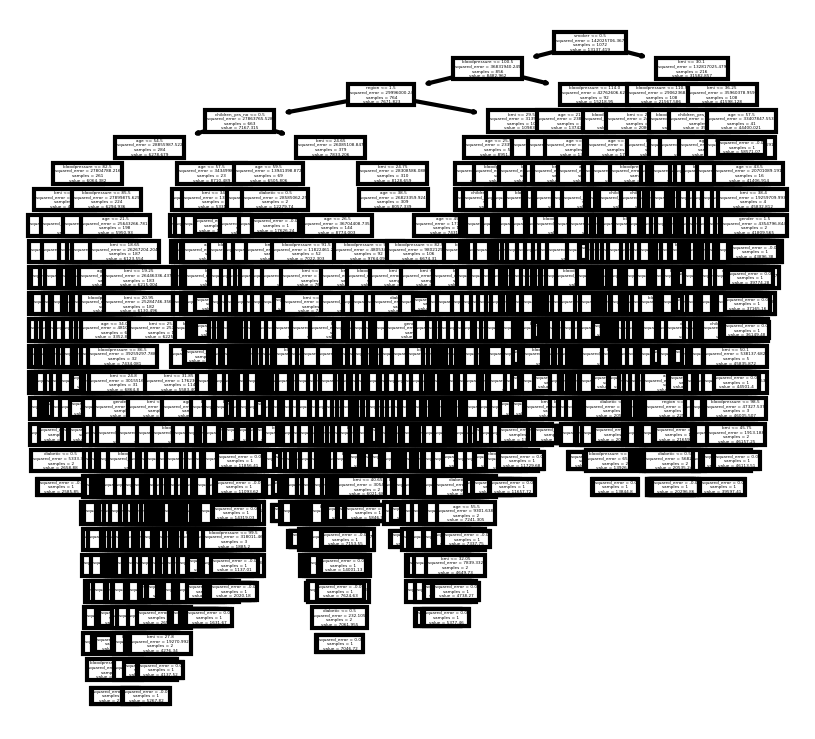

In [181]:
# Plotting the decision tree
fig, axes = plt.subplots(figsize=(3,3), dpi=300)
tree.plot_tree(reg_tree, feature_names=list(X), filled = False)
plt.show()

In [182]:
# Predicting the claim amount
y_pred = reg_tree.predict(X_test)

In [183]:
# MAPE (Mean Absolute Percentage Error)
np.mean(np.abs(y_test - y_pred)/y_test)*100

71.99758822158773

#### Using Cross-Validation to choose optimal depth

In [184]:
#Using Cross-Validation to choose optimal k
depth = list(range(1,15))

# empty list that will hold cv scores
cv_scores = []

# perform default k cross validation, i.e., 5-cross validation
for k in depth:
    dtr = DecisionTreeRegressor(max_depth=k)
    scores = cross_val_score(dtr, X_train, y_train, scoring='neg_mean_absolute_percentage_error')
    cv_scores.append(scores.mean())

In [185]:
error = [1- x for x in cv_scores]
error

[1.8895051972497172,
 1.7500364627479599,
 1.7061165079603138,
 1.6621841212472472,
 1.6757405734509154,
 1.6910217692034328,
 1.7045813170452824,
 1.725993239259967,
 1.7515089953936276,
 1.7682681200147499,
 1.7797314930036598,
 1.7869996265035835,
 1.787086368887164,
 1.777402832970705]

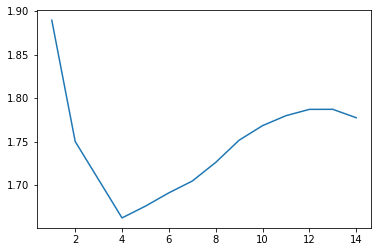

In [186]:
plt.plot(depth, error)
plt.show()

#choosing optimal k value as 4

#### Fitting Decision Tree using optimal depth 

In [187]:
# Fitting a decision tree regressor using optimal k as 4
reg_tree_opt = DecisionTreeRegressor(max_depth = 4) 
reg_tree_opt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=4)

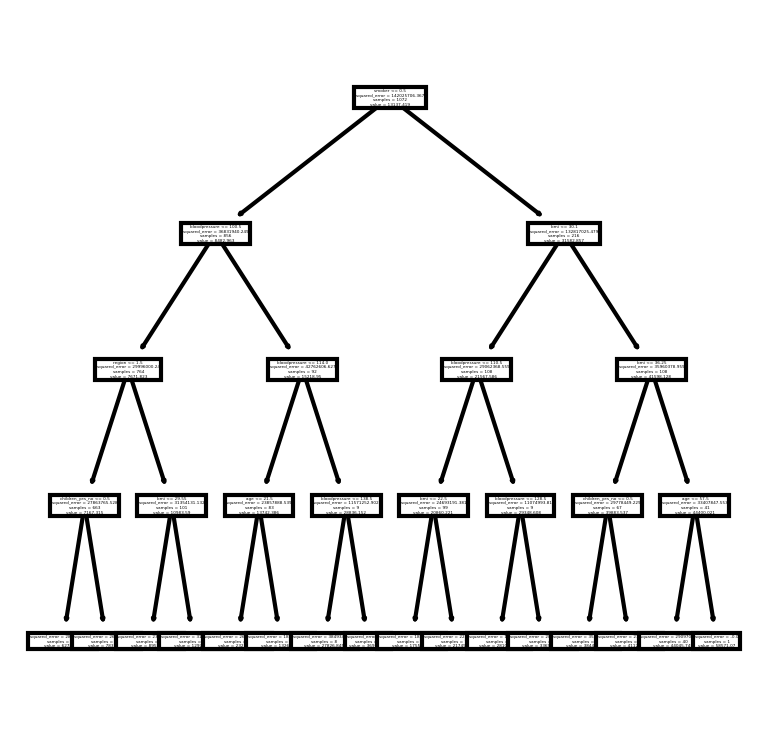

In [188]:
# Plotting the decision tree
fig, axes = plt.subplots(figsize=(3,3), dpi=300)
tree.plot_tree(reg_tree_opt, feature_names=list(X), filled = False)
plt.show()

In [189]:
# Predicting the claim amount
y_pred2 = reg_tree_opt.predict(X_test)

In [190]:
# MAPE (Mean Absolute Percentage Error)
np.mean(np.abs(y_test - y_pred2)/y_test)*100

61.99839430227178

#### Using the parameter min_samples_leaf parameter

In [191]:
# Fitting a decision tree regressor
reg_tree = DecisionTreeRegressor(max_depth=4, min_samples_leaf=5) 
reg_tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=4, min_samples_leaf=5)

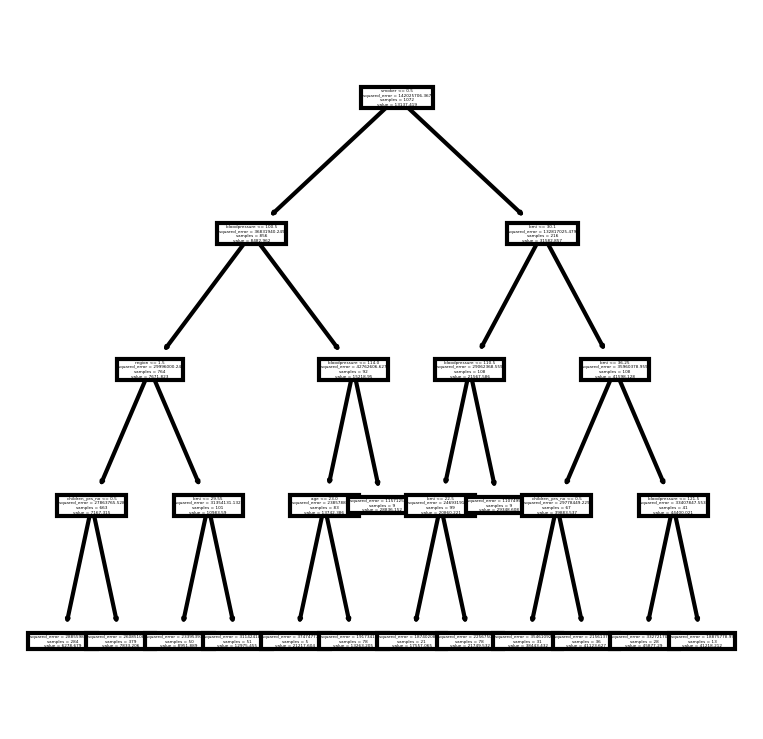

In [192]:
# Plotting the decision tree
fig, axes = plt.subplots(figsize=(3,3), dpi=300)
tree.plot_tree(reg_tree, feature_names=list(X), filled = False)
plt.show()

In [193]:
y_pred2 = reg_tree.predict(X_test)

In [194]:
# MAPE (Mean Absolute Percentage Error)
np.mean(np.abs(y_test - y_pred2)/y_test)*100

61.867098211173555

### Using the original dataset,
**with the default depth of the decision tree (i.e. 25), the MAPE = 71.99**  
**after using optimal depth (i.e. 4), the MAPE = 61.99**  
**after tuning the hyperparameters, (i.e. max_depth = 4 and min_samples_leaf = 5), the MAPE = 61.86**

## Fitting a Decision Tree using transformed features

In [237]:
transformed_df.head()

,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim,children_yes_no,BP_stage_1,BP_stage_2,BP_HP_crisis,bp_range,s*c,s*d,s*d*a,s*a,s_square
0,39.00,1,23.2,91,1,0,0,1,1121.87,0,0,1,0,2,0,0,0.0,0.0,1521.0000
1,24.00,1,30.1,87,0,0,0,1,1131.51,0,1,0,0,1,0,0,0.0,0.0,576.0000
2,38.08,1,33.3,82,1,0,0,1,1135.94,0,1,0,0,1,0,0,0.0,0.0,1450.0864
3,38.08,1,33.7,80,0,0,0,1,1136.40,0,0,0,1,3,0,0,0.0,0.0,1450.0864
4,38.08,1,34.1,100,0,0,0,1,1137.01,0,0,1,0,2,0,0,0.0,0.0,1450.0864


In [238]:
X_tf = transformed_df[['age','gender','bmi','bloodpressure','diabetic','children_yes_no','smoker','region','BP_stage_1',
                      'BP_stage_2','BP_HP_crisis','bp_range','s*c','s*d','s*d*a','s*a','s_square']]
Y_tf = transformed_df['claim']

In [239]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X_tf, Y_tf, test_size = 0.2,random_state = 42)

In [240]:
# Fitting a decision tree regressor
reg_tree_tf = DecisionTreeRegressor(max_depth = None) #with default max_depth
reg_tree_tf.fit(X_train, y_train)

DecisionTreeRegressor()

In [241]:
reg_tree.get_depth()

25

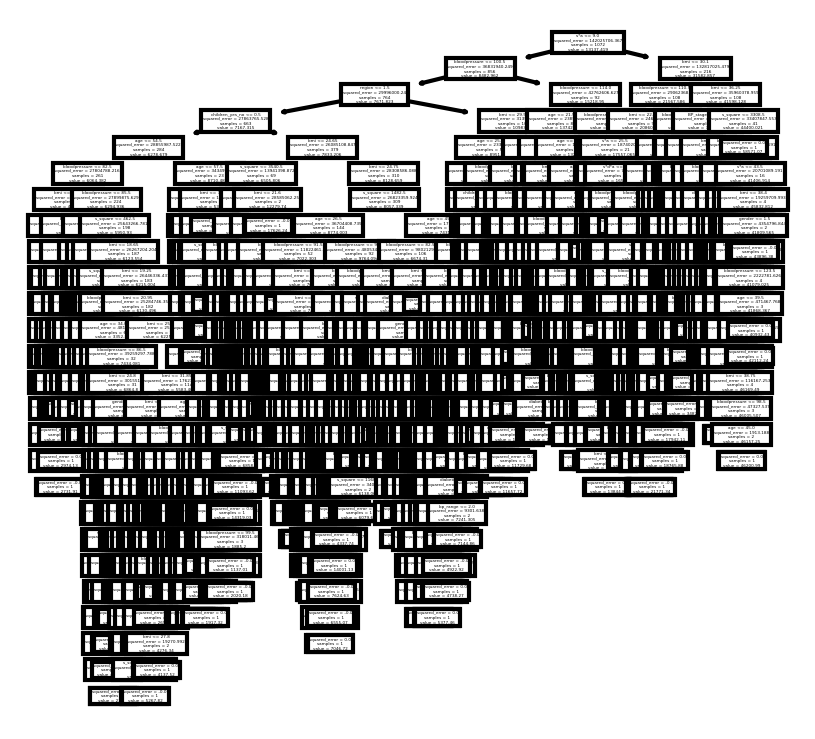

In [205]:
# Plotting the decision tree
fig, axes = plt.subplots(figsize=(3,3), dpi=300)
tree.plot_tree(reg_tree_tf, feature_names=list(X_tf), filled = False)
plt.show()

In [242]:
# Predicting the claim amount
y_pred = reg_tree_tf.predict(X_test)

In [243]:
# MAPE (Mean Absolute Percentage Error)
np.mean(np.abs(y_test - y_pred)/y_test)*100

75.94082299934752

#### Using Cross-Validation to choose optimal depth

In [244]:
#Using Cross-Validation to choose optimal k
depth = list(range(1,15))

# empty list that will hold cv scores
cv_scores = []

# perform default k cross validation, i.e., 5-cross validation
for k in depth:
    dtr_tf = DecisionTreeRegressor(max_depth=k)
    scores = cross_val_score(dtr_tf, X_train, y_train, scoring='neg_mean_absolute_percentage_error')
    cv_scores.append(scores.mean())

In [245]:
error = [1- x for x in cv_scores]
error

[1.8895051972497172,
 1.7500364627479597,
 1.706588293533194,
 1.6616620445498211,
 1.6760729562221368,
 1.6888220753389767,
 1.7021374590131984,
 1.725699663342288,
 1.7482565371428602,
 1.7654548902678566,
 1.7705194763777432,
 1.8064000185185876,
 1.791037292834336,
 1.7917504674588003]

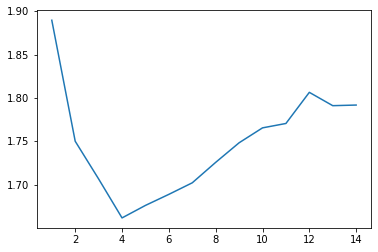

In [246]:
plt.plot(depth, error)
plt.show()

#choosing optimal k value as 4

#### Fitting the transformed data using the optimal depth

In [247]:
# Fitting a decision tree regressor
reg_tree_tf_opt = DecisionTreeRegressor(max_depth = 4) 
reg_tree_tf_opt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=4)

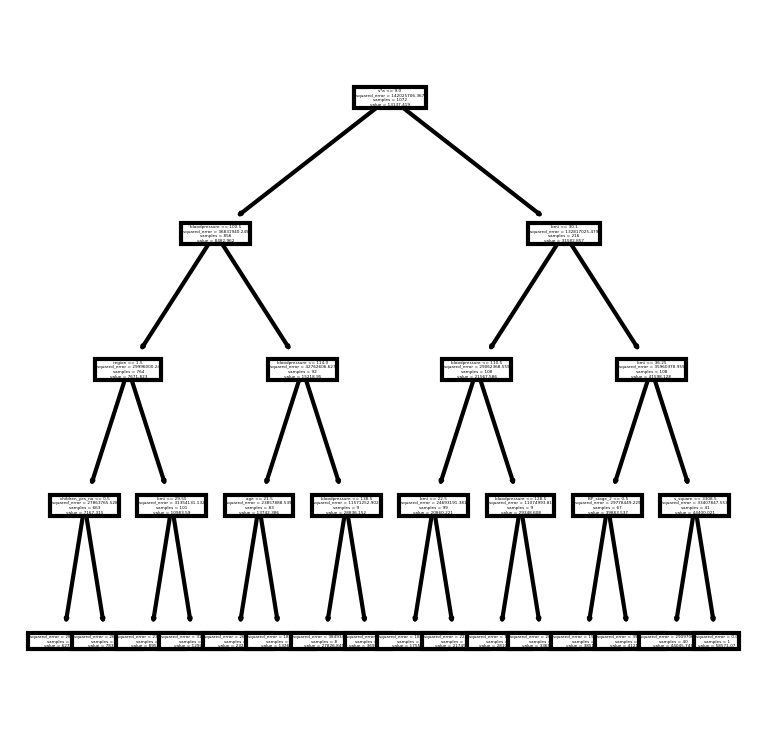

In [212]:
# Plotting the decision tree
fig, axes = plt.subplots(figsize=(3,3), dpi=300)
tree.plot_tree(reg_tree_tf_opt, feature_names=list(X_tf), filled = False)
plt.show()

In [248]:
# Predicting the claim amount
y_pred_tf_opt = reg_tree_tf_opt.predict(X_test)

In [249]:
# MAPE (Mean Absolute Percentage Error)
np.mean(np.abs(y_test - y_pred_tf_opt)/y_test)*100

61.96812063176588

#### Fitting the transformed data using the optimal depth and min_samples_leaf parameter

In [250]:
# Fitting a decision tree regressor
reg_tree_tf_optparam = DecisionTreeRegressor(max_depth=4, min_samples_leaf=5) 
reg_tree_tf_optparam.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=4, min_samples_leaf=5)

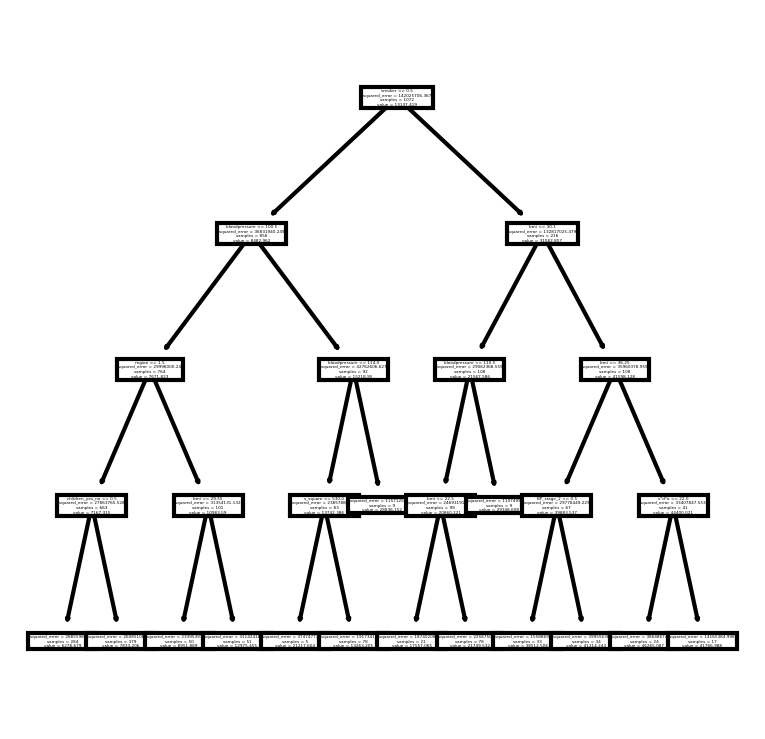

In [251]:
# Plotting the decision tree
fig, axes = plt.subplots(figsize=(3,3), dpi=300)
tree.plot_tree(reg_tree_tf_optparam, feature_names=list(X_tf), filled = False)
plt.show()

In [252]:
y_pred_tf_opt = reg_tree_tf_optparam.predict(X_test)

In [253]:
# MAPE (Mean Absolute Percentage Error)
np.mean(np.abs(y_test - y_pred_tf_opt)/y_test)*100

61.996894638144205

## Using Transformed Dataset,
**with the default depth of the decision tree (i.e. 25), the MAPE = 75.94**  
**after using optimal depth (i.e. 4), the MAPE = 61.96**  
**after tuning the hyperparameters, (i.e. max_depth = 4 and min_samples_leaf = 5), the MAPE = 61.99**

### Hence, the best decision tree model we have is the original attributes after hyperparameter tuning, max_depth = 4 and min_samples_leaf = 5. The best MAPE with the decision tree model is 61.86.